In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sqlalchemy import create_engine
import json

#### Configuración de tema matplotlib

In [2]:
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-light.mplstyle')
pd.set_option('display.max_columns', None)

#### Conexión a base de datos

In [3]:
with open('../config/lyft_conection.json', 'r') as file:
    credenciales_lyft = json.load(file)

engine = create_engine(f"mysql+pymysql://{credenciales_lyft['USERNAME']}:{credenciales_lyft['PASSWORD']}@{credenciales_lyft['SERVER']}/{credenciales_lyft['DATABASE']}")

### Consultas a base de datos

In [4]:
start_date = '2024-12-01 00:00:00'
end_date = '2025-12-31 23:59:59'

In [5]:
sql_transactions = f'''

SELECT 
    bikeAccountNumber,
    initializationDateTime,
    processingDateTime,
    completionDateTime,
    merchantTxId,
    amount,
    authorizationNumber,
    paymentType_id,
    paymentBusinessContext_id,
    paymentMode_id,
    paymentResult_id,
    paymentResultReason_id,
    paymentSourceType_id,
    bikeAccountType_id,
    creditCardType_id,
    creditCardId,
    cardBin,
    cardBinBrand,
    cardBinCountry,
    cardBinSubType,
    cardBinType,
    cardBinResult_id,
    reasonCode
FROM BikePaymentFact
WHERE 
	creationDateTime BETWEEN UNIX_TIMESTAMP(CONVERT_TZ("{start_date}", "America/Mexico_City", 'UTC'))*1000
    AND UNIX_TIMESTAMP(CONVERT_TZ("{end_date}", "America/Mexico_City", 'UTC'))*1000;

'''

df_sql_transactions = pd.read_sql(sql_transactions, engine)
df_sql_transactions.head(2)

,bikeAccountNumber,initializationDateTime,processingDateTime,completionDateTime,merchantTxId,amount,authorizationNumber,paymentType_id,paymentBusinessContext_id,paymentMode_id,paymentResult_id,paymentResultReason_id,paymentSourceType_id,bikeAccountType_id,creditCardType_id,creditCardId,cardBin,cardBinBrand,cardBinCountry,cardBinSubType,cardBinType,cardBinResult_id,reasonCode
0,BX2Y9CGV,1.733033e+12,1733032801037,1733032801037,cyb_cnp0006637441,0,None,6,2003,6565653,1,241234,1,1,2.0,43a9a69f-1338-42bb-b0c3-78be26747ea3,551238.0,MASTERCARD,MEX,STANDARD,DEBIT,0.0,None
1,Z8JYWXGN,1.733033e+12,1733032801998,1733032801998,cyb_cnp0006637442,0,None,6,2003,6565653,1,241234,1,1,1.0,e9bc54d2-d8d7-4b6b-a821-6246c8035e43,418914.0,VISA,MEX,CLASSIC,DEBIT,0.0,None


In [6]:
sql_PaymentTypeDim = f'''

SELECT 
    id,
    localizedValue0
FROM PaymentTypeDim

'''

df_sql_PaymentTypeDim = pd.read_sql(sql_PaymentTypeDim, engine)

df_sql_PaymentTypeDim.head()

,id,localizedValue0
0,0,Purchase
1,1,Pre-authorization
2,2,Completion
3,3,Refund
4,4,Refund (ind.)


In [7]:
sql_PaymentBusinessContextDim = f'''

SELECT 
    id,
    localizedValue0
FROM PaymentBusinessContextDim

'''

df_sql_PaymentBusinessContextDim = pd.read_sql(sql_PaymentBusinessContextDim, engine)
df_sql_PaymentBusinessContextDim.head()

,id,localizedValue0
0,0,-
1,2000,Bike
2,2001,Migrated Payments
3,2002,Bike // Credit card validation
4,2003,Bike // Processing credit card validation pre-...


In [8]:
sql_PaymentModeDim = f'''

SELECT 
    id,
    localizedValue0
FROM PaymentModeDim

'''

df_sql_PaymentModeDim = pd.read_sql(sql_PaymentModeDim, engine)
df_sql_PaymentModeDim.head()

,id,localizedValue0
0,4798412,External
1,5646456,Cash
2,6565426,Electronic
3,6565653,Credit card
4,8308550,Mobile


In [9]:
sql_PaymentResultDim = f'''

SELECT 
    id,
    localizedValue0
FROM PaymentResultDim

'''

df_sql_PaymentResultDim = pd.read_sql(sql_PaymentResultDim, engine)
df_sql_PaymentResultDim.head()

,id,localizedValue0
0,0,Unknown
1,1,Accepted
2,2,Refused
3,3,Incomplete
4,4,Cancelled


In [10]:
sql_PaymentResultReasonDim = f'''

SELECT 
    id,
    localizedValue0
FROM PaymentResultReasonDim

'''

df_sql_PaymentResultReasonDim = pd.read_sql(sql_PaymentResultReasonDim, engine)
df_sql_PaymentResultReasonDim.head()

,id,localizedValue0
0,23423,See response code
1,75445,Credit card expired
2,88923,View error code
3,104583,AVS mismatch
4,159489,Credit card deleted error


In [11]:
sql_PaymentSourceTypeDim = f'''

SELECT 
    id,
    localizedValue0
FROM PaymentSourceTypeDim

'''

df_sql_PaymentSourceTypeDim = pd.read_sql(sql_PaymentSourceTypeDim, engine)
df_sql_PaymentSourceTypeDim.head()

,id,localizedValue0
0,1,Backend payment source
1,2,Console payment source
2,3,PED
3,10,Test payment source
4,30,Bike web service payment source


In [12]:
sql_BikeAccountTypeDim = f'''

SELECT 
    id,
    localizedValue0
FROM BikeAccountTypeDim

'''

df_sql_BikeAccountTypeDim = pd.read_sql(sql_BikeAccountTypeDim, engine)
df_sql_BikeAccountTypeDim.head()

,id,localizedValue0
0,-128,Unknown
1,1,Member
2,2,Casual


In [13]:
sql_CreditCardTypeDim = f'''

SELECT 
    id,
    localizedValue0
FROM CreditCardTypeDim

'''

df_sql_CreditCardTypeDim = pd.read_sql(sql_CreditCardTypeDim, engine)
df_sql_CreditCardTypeDim.head()

,id,localizedValue0
0,0,Unknown
1,1,Visa
2,2,Mastercard
3,3,Amex
4,4,Discover


In [14]:
sql_PaymentCreditCardBinResultDim = f'''

SELECT 
    id,
    localizedValue0
FROM CreditCardTypeDim

'''

df_sql_PaymentCreditCardBinResultDim = pd.read_sql(sql_PaymentCreditCardBinResultDim, engine)
df_sql_PaymentCreditCardBinResultDim.head()

,id,localizedValue0
0,0,Unknown
1,1,Visa
2,2,Mastercard
3,3,Amex
4,4,Discover


### Transformaciones

In [15]:
# convertir cardBin a entero sin decimales
df_sql_transactions['cardBin'] = pd.to_numeric(df_sql_transactions['cardBin'], errors='coerce').fillna(0).astype(int)
df_sql_transactions.head(2)

,bikeAccountNumber,initializationDateTime,processingDateTime,completionDateTime,merchantTxId,amount,authorizationNumber,paymentType_id,paymentBusinessContext_id,paymentMode_id,paymentResult_id,paymentResultReason_id,paymentSourceType_id,bikeAccountType_id,creditCardType_id,creditCardId,cardBin,cardBinBrand,cardBinCountry,cardBinSubType,cardBinType,cardBinResult_id,reasonCode
0,BX2Y9CGV,1.733033e+12,1733032801037,1733032801037,cyb_cnp0006637441,0,None,6,2003,6565653,1,241234,1,1,2.0,43a9a69f-1338-42bb-b0c3-78be26747ea3,551238,MASTERCARD,MEX,STANDARD,DEBIT,0.0,None
1,Z8JYWXGN,1.733033e+12,1733032801998,1733032801998,cyb_cnp0006637442,0,None,6,2003,6565653,1,241234,1,1,1.0,e9bc54d2-d8d7-4b6b-a821-6246c8035e43,418914,VISA,MEX,CLASSIC,DEBIT,0.0,None


In [16]:
# importar CSV
csv_file_path = '../data/Bin_ECOBICI.csv'
df_bines = pd.read_csv(csv_file_path, encoding='utf-8')
df_bines.head(1)

,BIN,LONGITUD,RANGO,ID INSTITUCIÃN,INSTITUCIÃN,PRODUCTO,NOMBRE CORTO,NATURALEZA,MARCA
0,202022,6,COMPLETO,110030,BAJIO,PRESTAMOS ABCD,ABCD,CRÃDITO,PRIVADA


In [17]:
# Agregar datos de df_bines a df_sql_transactions
df_merged = pd.merge(df_sql_transactions, df_bines, how='left', left_on='cardBin', right_on='BIN')
df_merged.head(1)

,bikeAccountNumber,initializationDateTime,processingDateTime,completionDateTime,merchantTxId,amount,authorizationNumber,paymentType_id,paymentBusinessContext_id,paymentMode_id,paymentResult_id,paymentResultReason_id,paymentSourceType_id,bikeAccountType_id,creditCardType_id,creditCardId,cardBin,cardBinBrand,cardBinCountry,cardBinSubType,cardBinType,cardBinResult_id,reasonCode,BIN,LONGITUD,RANGO,ID INSTITUCIÃN,INSTITUCIÃN,PRODUCTO,NOMBRE CORTO,NATURALEZA,MARCA
0,BX2Y9CGV,1.733033e+12,1733032801037,1733032801037,cyb_cnp0006637441,0,None,6,2003,6565653,1,241234,1,1,2.0,43a9a69f-1338-42bb-b0c3-78be26747ea3,551238,MASTERCARD,MEX,STANDARD,DEBIT,0.0,None,551238.0,6.0,COMPLETO,110127.0,AZTECA,PAQUETE FAMILIAR AZTECA,-,DÃBITO,MASTER CARD


In [18]:
# Formatos de fecha
df_merged['initializationDateTime'] = pd.to_datetime(df_merged['initializationDateTime'], unit='ms').dt.tz_localize('UTC').dt.tz_convert('America/Mexico_City')
df_merged['processingDateTime'] = pd.to_datetime(df_merged['processingDateTime'], unit='ms').dt.tz_localize('UTC').dt.tz_convert('America/Mexico_City')
df_merged['completionDateTime'] = pd.to_datetime(df_merged['completionDateTime'], unit='ms').dt.tz_localize('UTC').dt.tz_convert('America/Mexico_City')
df_merged.head(1)


,bikeAccountNumber,initializationDateTime,processingDateTime,completionDateTime,merchantTxId,amount,authorizationNumber,paymentType_id,paymentBusinessContext_id,paymentMode_id,paymentResult_id,paymentResultReason_id,paymentSourceType_id,bikeAccountType_id,creditCardType_id,creditCardId,cardBin,cardBinBrand,cardBinCountry,cardBinSubType,cardBinType,cardBinResult_id,reasonCode,BIN,LONGITUD,RANGO,ID INSTITUCIÃN,INSTITUCIÃN,PRODUCTO,NOMBRE CORTO,NATURALEZA,MARCA
0,BX2Y9CGV,2024-12-01 00:00:00.179000-06:00,2024-12-01 00:00:01.037000-06:00,2024-12-01 00:00:01.037000-06:00,cyb_cnp0006637441,0,None,6,2003,6565653,1,241234,1,1,2.0,43a9a69f-1338-42bb-b0c3-78be26747ea3,551238,MASTERCARD,MEX,STANDARD,DEBIT,0.0,None,551238.0,6.0,COMPLETO,110127.0,AZTECA,PAQUETE FAMILIAR AZTECA,-,DÃBITO,MASTER CARD


#### PaymentTypeDim
Contains information pertaining to the type of transaction.

In [19]:
df_merged['tipo_pago'] = df_merged.merge(df_sql_PaymentTypeDim[['id', 'localizedValue0']], how='left', left_on='paymentType_id', right_on='id')['localizedValue0']
df_merged.head(1)

,bikeAccountNumber,initializationDateTime,processingDateTime,completionDateTime,merchantTxId,amount,authorizationNumber,paymentType_id,paymentBusinessContext_id,paymentMode_id,paymentResult_id,paymentResultReason_id,paymentSourceType_id,bikeAccountType_id,creditCardType_id,creditCardId,cardBin,cardBinBrand,cardBinCountry,cardBinSubType,cardBinType,cardBinResult_id,reasonCode,BIN,LONGITUD,RANGO,ID INSTITUCIÃN,INSTITUCIÃN,PRODUCTO,NOMBRE CORTO,NATURALEZA,MARCA,tipo_pago
0,BX2Y9CGV,2024-12-01 00:00:00.179000-06:00,2024-12-01 00:00:01.037000-06:00,2024-12-01 00:00:01.037000-06:00,cyb_cnp0006637441,0,None,6,2003,6565653,1,241234,1,1,2.0,43a9a69f-1338-42bb-b0c3-78be26747ea3,551238,MASTERCARD,MEX,STANDARD,DEBIT,0.0,None,551238.0,6.0,COMPLETO,110127.0,AZTECA,PAQUETE FAMILIAR AZTECA,-,DÃBITO,MASTER CARD,Pre-authorization reversal


#### PaymentBusinessContextDim
Contains information pertaining to the business context of the payment.

In [20]:
df_merged['contexto_negocio_pago'] = df_merged.merge(df_sql_PaymentBusinessContextDim[['id', 'localizedValue0']], how='left', left_on='paymentBusinessContext_id', right_on='id')['localizedValue0']
df_merged.head(1)

,bikeAccountNumber,initializationDateTime,processingDateTime,completionDateTime,merchantTxId,amount,authorizationNumber,paymentType_id,paymentBusinessContext_id,paymentMode_id,paymentResult_id,paymentResultReason_id,paymentSourceType_id,bikeAccountType_id,creditCardType_id,creditCardId,cardBin,cardBinBrand,cardBinCountry,cardBinSubType,cardBinType,cardBinResult_id,reasonCode,BIN,LONGITUD,RANGO,ID INSTITUCIÃN,INSTITUCIÃN,PRODUCTO,NOMBRE CORTO,NATURALEZA,MARCA,tipo_pago,contexto_negocio_pago
0,BX2Y9CGV,2024-12-01 00:00:00.179000-06:00,2024-12-01 00:00:01.037000-06:00,2024-12-01 00:00:01.037000-06:00,cyb_cnp0006637441,0,None,6,2003,6565653,1,241234,1,1,2.0,43a9a69f-1338-42bb-b0c3-78be26747ea3,551238,MASTERCARD,MEX,STANDARD,DEBIT,0.0,None,551238.0,6.0,COMPLETO,110127.0,AZTECA,PAQUETE FAMILIAR AZTECA,-,DÃBITO,MASTER CARD,Pre-authorization reversal,Bike // Processing credit card validation pre-...


#### PaymentModeDim
Contains information pertaining to the payment means

In [21]:
df_merged['modo_pago'] = df_merged.merge(df_sql_PaymentModeDim[['id', 'localizedValue0']], how='left', left_on='paymentMode_id', right_on='id')['localizedValue0']
df_merged.head(1)

,bikeAccountNumber,initializationDateTime,processingDateTime,completionDateTime,merchantTxId,amount,authorizationNumber,paymentType_id,paymentBusinessContext_id,paymentMode_id,paymentResult_id,paymentResultReason_id,paymentSourceType_id,bikeAccountType_id,creditCardType_id,creditCardId,cardBin,cardBinBrand,cardBinCountry,cardBinSubType,cardBinType,cardBinResult_id,reasonCode,BIN,LONGITUD,RANGO,ID INSTITUCIÃN,INSTITUCIÃN,PRODUCTO,NOMBRE CORTO,NATURALEZA,MARCA,tipo_pago,contexto_negocio_pago,modo_pago
0,BX2Y9CGV,2024-12-01 00:00:00.179000-06:00,2024-12-01 00:00:01.037000-06:00,2024-12-01 00:00:01.037000-06:00,cyb_cnp0006637441,0,None,6,2003,6565653,1,241234,1,1,2.0,43a9a69f-1338-42bb-b0c3-78be26747ea3,551238,MASTERCARD,MEX,STANDARD,DEBIT,0.0,None,551238.0,6.0,COMPLETO,110127.0,AZTECA,PAQUETE FAMILIAR AZTECA,-,DÃBITO,MASTER CARD,Pre-authorization reversal,Bike // Processing credit card validation pre-...,Credit card


#### PaymentResultDim
Contains the result of a payment

In [22]:
df_merged['resultado_pago'] = df_merged.merge(df_sql_PaymentResultDim[['id', 'localizedValue0']], how='left', left_on='paymentResult_id', right_on='id')['localizedValue0']
df_merged.head(1)

,bikeAccountNumber,initializationDateTime,processingDateTime,completionDateTime,merchantTxId,amount,authorizationNumber,paymentType_id,paymentBusinessContext_id,paymentMode_id,paymentResult_id,paymentResultReason_id,paymentSourceType_id,bikeAccountType_id,creditCardType_id,creditCardId,cardBin,cardBinBrand,cardBinCountry,cardBinSubType,cardBinType,cardBinResult_id,reasonCode,BIN,LONGITUD,RANGO,ID INSTITUCIÃN,INSTITUCIÃN,PRODUCTO,NOMBRE CORTO,NATURALEZA,MARCA,tipo_pago,contexto_negocio_pago,modo_pago,resultado_pago
0,BX2Y9CGV,2024-12-01 00:00:00.179000-06:00,2024-12-01 00:00:01.037000-06:00,2024-12-01 00:00:01.037000-06:00,cyb_cnp0006637441,0,None,6,2003,6565653,1,241234,1,1,2.0,43a9a69f-1338-42bb-b0c3-78be26747ea3,551238,MASTERCARD,MEX,STANDARD,DEBIT,0.0,None,551238.0,6.0,COMPLETO,110127.0,AZTECA,PAQUETE FAMILIAR AZTECA,-,DÃBITO,MASTER CARD,Pre-authorization reversal,Bike // Processing credit card validation pre-...,Credit card,Accepted


#### PaymentResultReasonDim
Contains the result reason of a payment.

In [23]:
df_merged['razon_rechazo_pago'] = df_merged.merge(df_sql_PaymentResultReasonDim[['id', 'localizedValue0']], how='left', left_on='paymentResultReason_id', right_on='id')['localizedValue0']
df_merged.head(1)

,bikeAccountNumber,initializationDateTime,processingDateTime,completionDateTime,merchantTxId,amount,authorizationNumber,paymentType_id,paymentBusinessContext_id,paymentMode_id,paymentResult_id,paymentResultReason_id,paymentSourceType_id,bikeAccountType_id,creditCardType_id,creditCardId,cardBin,cardBinBrand,cardBinCountry,cardBinSubType,cardBinType,cardBinResult_id,reasonCode,BIN,LONGITUD,RANGO,ID INSTITUCIÃN,INSTITUCIÃN,PRODUCTO,NOMBRE CORTO,NATURALEZA,MARCA,tipo_pago,contexto_negocio_pago,modo_pago,resultado_pago,razon_rechazo_pago
0,BX2Y9CGV,2024-12-01 00:00:00.179000-06:00,2024-12-01 00:00:01.037000-06:00,2024-12-01 00:00:01.037000-06:00,cyb_cnp0006637441,0,None,6,2003,6565653,1,241234,1,1,2.0,43a9a69f-1338-42bb-b0c3-78be26747ea3,551238,MASTERCARD,MEX,STANDARD,DEBIT,0.0,None,551238.0,6.0,COMPLETO,110127.0,AZTECA,PAQUETE FAMILIAR AZTECA,-,DÃBITO,MASTER CARD,Pre-authorization reversal,Bike // Processing credit card validation pre-...,Credit card,Accepted,None


#### PaymentSourceTypeDim
Contains the type of the payment source.

In [24]:
df_merged['fuente_pago'] = df_merged.merge(df_sql_PaymentSourceTypeDim[['id', 'localizedValue0']], how='left', left_on='paymentSourceType_id', right_on='id')['localizedValue0']
df_merged.head(1)

,bikeAccountNumber,initializationDateTime,processingDateTime,completionDateTime,merchantTxId,amount,authorizationNumber,paymentType_id,paymentBusinessContext_id,paymentMode_id,paymentResult_id,paymentResultReason_id,paymentSourceType_id,bikeAccountType_id,creditCardType_id,creditCardId,cardBin,cardBinBrand,cardBinCountry,cardBinSubType,cardBinType,cardBinResult_id,reasonCode,BIN,LONGITUD,RANGO,ID INSTITUCIÃN,INSTITUCIÃN,PRODUCTO,NOMBRE CORTO,NATURALEZA,MARCA,tipo_pago,contexto_negocio_pago,modo_pago,resultado_pago,razon_rechazo_pago,fuente_pago
0,BX2Y9CGV,2024-12-01 00:00:00.179000-06:00,2024-12-01 00:00:01.037000-06:00,2024-12-01 00:00:01.037000-06:00,cyb_cnp0006637441,0,None,6,2003,6565653,1,241234,1,1,2.0,43a9a69f-1338-42bb-b0c3-78be26747ea3,551238,MASTERCARD,MEX,STANDARD,DEBIT,0.0,None,551238.0,6.0,COMPLETO,110127.0,AZTECA,PAQUETE FAMILIAR AZTECA,-,DÃBITO,MASTER CARD,Pre-authorization reversal,Bike // Processing credit card validation pre-...,Credit card,Accepted,None,Backend payment source


#### BikeAccountTypeDim
Contains information pertaining to types of bike accounts.

In [25]:
df_merged['tipo_de_ciclista'] = df_merged.merge(df_sql_BikeAccountTypeDim[['id', 'localizedValue0']], how='left', left_on='paymentSourceType_id', right_on='id')['localizedValue0']
df_merged.head(1)

,bikeAccountNumber,initializationDateTime,processingDateTime,completionDateTime,merchantTxId,amount,authorizationNumber,paymentType_id,paymentBusinessContext_id,paymentMode_id,paymentResult_id,paymentResultReason_id,paymentSourceType_id,bikeAccountType_id,creditCardType_id,creditCardId,cardBin,cardBinBrand,cardBinCountry,cardBinSubType,cardBinType,cardBinResult_id,reasonCode,BIN,LONGITUD,RANGO,ID INSTITUCIÃN,INSTITUCIÃN,PRODUCTO,NOMBRE CORTO,NATURALEZA,MARCA,tipo_pago,contexto_negocio_pago,modo_pago,resultado_pago,razon_rechazo_pago,fuente_pago,tipo_de_ciclista
0,BX2Y9CGV,2024-12-01 00:00:00.179000-06:00,2024-12-01 00:00:01.037000-06:00,2024-12-01 00:00:01.037000-06:00,cyb_cnp0006637441,0,None,6,2003,6565653,1,241234,1,1,2.0,43a9a69f-1338-42bb-b0c3-78be26747ea3,551238,MASTERCARD,MEX,STANDARD,DEBIT,0.0,None,551238.0,6.0,COMPLETO,110127.0,AZTECA,PAQUETE FAMILIAR AZTECA,-,DÃBITO,MASTER CARD,Pre-authorization reversal,Bike // Processing credit card validation pre-...,Credit card,Accepted,None,Backend payment source,Member


#### CreditCardTypeDim
Contains information pertaining to types of credit cards

In [26]:
df_merged['tipo_de_tarjeta'] = df_merged.merge(df_sql_CreditCardTypeDim[['id', 'localizedValue0']], how='left', left_on='creditCardType_id', right_on='id')['localizedValue0']
df_merged.head(1)

,bikeAccountNumber,initializationDateTime,processingDateTime,completionDateTime,merchantTxId,amount,authorizationNumber,paymentType_id,paymentBusinessContext_id,paymentMode_id,paymentResult_id,paymentResultReason_id,paymentSourceType_id,bikeAccountType_id,creditCardType_id,creditCardId,cardBin,cardBinBrand,cardBinCountry,cardBinSubType,cardBinType,cardBinResult_id,reasonCode,BIN,LONGITUD,RANGO,ID INSTITUCIÃN,INSTITUCIÃN,PRODUCTO,NOMBRE CORTO,NATURALEZA,MARCA,tipo_pago,contexto_negocio_pago,modo_pago,resultado_pago,razon_rechazo_pago,fuente_pago,tipo_de_ciclista,tipo_de_tarjeta
0,BX2Y9CGV,2024-12-01 00:00:00.179000-06:00,2024-12-01 00:00:01.037000-06:00,2024-12-01 00:00:01.037000-06:00,cyb_cnp0006637441,0,None,6,2003,6565653,1,241234,1,1,2.0,43a9a69f-1338-42bb-b0c3-78be26747ea3,551238,MASTERCARD,MEX,STANDARD,DEBIT,0.0,None,551238.0,6.0,COMPLETO,110127.0,AZTECA,PAQUETE FAMILIAR AZTECA,-,DÃBITO,MASTER CARD,Pre-authorization reversal,Bike // Processing credit card validation pre-...,Credit card,Accepted,None,Backend payment source,Member,Mastercard


#### PaymentCreditCardBinResultDim
Contains the result information pertaining to the credit card BIN (bank identification number). The BIN corresponds to the first 6 digits
of the credit card number.

In [27]:
df_merged['resultado_tarjeta_credito'] = df_merged.merge(df_sql_PaymentCreditCardBinResultDim[['id', 'localizedValue0']], how='left', left_on='cardBinResult_id', right_on='id')['localizedValue0']
df_merged.head(1)

,bikeAccountNumber,initializationDateTime,processingDateTime,completionDateTime,merchantTxId,amount,authorizationNumber,paymentType_id,paymentBusinessContext_id,paymentMode_id,paymentResult_id,paymentResultReason_id,paymentSourceType_id,bikeAccountType_id,creditCardType_id,creditCardId,cardBin,cardBinBrand,cardBinCountry,cardBinSubType,cardBinType,cardBinResult_id,reasonCode,BIN,LONGITUD,RANGO,ID INSTITUCIÃN,INSTITUCIÃN,PRODUCTO,NOMBRE CORTO,NATURALEZA,MARCA,tipo_pago,contexto_negocio_pago,modo_pago,resultado_pago,razon_rechazo_pago,fuente_pago,tipo_de_ciclista,tipo_de_tarjeta,resultado_tarjeta_credito
0,BX2Y9CGV,2024-12-01 00:00:00.179000-06:00,2024-12-01 00:00:01.037000-06:00,2024-12-01 00:00:01.037000-06:00,cyb_cnp0006637441,0,None,6,2003,6565653,1,241234,1,1,2.0,43a9a69f-1338-42bb-b0c3-78be26747ea3,551238,MASTERCARD,MEX,STANDARD,DEBIT,0.0,None,551238.0,6.0,COMPLETO,110127.0,AZTECA,PAQUETE FAMILIAR AZTECA,-,DÃBITO,MASTER CARD,Pre-authorization reversal,Bike // Processing credit card validation pre-...,Credit card,Accepted,None,Backend payment source,Member,Mastercard,Unknown


In [28]:
# Renombrar columnas
df_merged.rename(columns={
    'bikeAccountNumber': 'numero_cuenta_bici',
    'initializationDateTime': 'fecha_hora_inicializacion',
    'processingDateTime': 'fecha_hora_procesamiento',
    'completionDateTime': 'fecha_hora_completacion',
    'merchantTxId': 'id_transaccion_comerciante',
    'amount': 'monto',
    'authorizationNumber': 'numero_autorizacion',
    'creditCardId': 'id_tarjeta_credito',
    'cardBin': 'bin_tarjeta',
    'cardBinBrand': 'marca_bin',
    'cardBinCountry': 'pais_bin',
    'cardBinSubType': 'subtipo_bin',
    'cardBinType': 'tipo_tarjeta',
    'cardBinResult_id': 'id_resultado_bin',
    'reasonCode': 'codigo_razon'
}, inplace=True)
df_merged.head(1)

,numero_cuenta_bici,fecha_hora_inicializacion,fecha_hora_procesamiento,fecha_hora_completacion,id_transaccion_comerciante,monto,numero_autorizacion,paymentType_id,paymentBusinessContext_id,paymentMode_id,paymentResult_id,paymentResultReason_id,paymentSourceType_id,bikeAccountType_id,creditCardType_id,id_tarjeta_credito,bin_tarjeta,marca_bin,pais_bin,subtipo_bin,tipo_tarjeta,id_resultado_bin,codigo_razon,BIN,LONGITUD,RANGO,ID INSTITUCIÃN,INSTITUCIÃN,PRODUCTO,NOMBRE CORTO,NATURALEZA,MARCA,tipo_pago,contexto_negocio_pago,modo_pago,resultado_pago,razon_rechazo_pago,fuente_pago,tipo_de_ciclista,tipo_de_tarjeta,resultado_tarjeta_credito
0,BX2Y9CGV,2024-12-01 00:00:00.179000-06:00,2024-12-01 00:00:01.037000-06:00,2024-12-01 00:00:01.037000-06:00,cyb_cnp0006637441,0,None,6,2003,6565653,1,241234,1,1,2.0,43a9a69f-1338-42bb-b0c3-78be26747ea3,551238,MASTERCARD,MEX,STANDARD,DEBIT,0.0,None,551238.0,6.0,COMPLETO,110127.0,AZTECA,PAQUETE FAMILIAR AZTECA,-,DÃBITO,MASTER CARD,Pre-authorization reversal,Bike // Processing credit card validation pre-...,Credit card,Accepted,None,Backend payment source,Member,Mastercard,Unknown


In [29]:
# Eliminar columnas innecesarias
columns_to_drop = [
    'paymentType_id',
    'paymentBusinessContext_id',
    'paymentMode_id',
    'paymentResult_id',
    'paymentResultReason_id',
    'paymentSourceType_id',
    'bikeAccountType_id',
    'creditCardType_id',
    'marca_bin',
    'BIN',
    'marca_bin',
    'NATURALEZA',
    'id_resultado_bin',
    'MARCA'
]
df_merged.drop(columns=columns_to_drop, inplace=True)
df_merged.head(1)

,numero_cuenta_bici,fecha_hora_inicializacion,fecha_hora_procesamiento,fecha_hora_completacion,id_transaccion_comerciante,monto,numero_autorizacion,id_tarjeta_credito,bin_tarjeta,pais_bin,subtipo_bin,tipo_tarjeta,codigo_razon,LONGITUD,RANGO,ID INSTITUCIÃN,INSTITUCIÃN,PRODUCTO,NOMBRE CORTO,tipo_pago,contexto_negocio_pago,modo_pago,resultado_pago,razon_rechazo_pago,fuente_pago,tipo_de_ciclista,tipo_de_tarjeta,resultado_tarjeta_credito
0,BX2Y9CGV,2024-12-01 00:00:00.179000-06:00,2024-12-01 00:00:01.037000-06:00,2024-12-01 00:00:01.037000-06:00,cyb_cnp0006637441,0,None,43a9a69f-1338-42bb-b0c3-78be26747ea3,551238,MEX,STANDARD,DEBIT,None,6.0,COMPLETO,110127.0,AZTECA,PAQUETE FAMILIAR AZTECA,-,Pre-authorization reversal,Bike // Processing credit card validation pre-...,Credit card,Accepted,None,Backend payment source,Member,Mastercard,Unknown


In [30]:
# renombrar columnas
df_merged.rename(columns={
    'LONGITUD': 'longitud_bin',
    'RANGO': 'rango_bin',
    'INSTITUCIÃN': 'institucion_bin',
    'ID INSTITUCIÃN': 'id_institucion_bin',
    'PRODUCTO': 'producto_bin',
    'NOMBRE CORTO': 'nombre_corto_bin'
}, inplace=True)
df_merged.head(1)

,numero_cuenta_bici,fecha_hora_inicializacion,fecha_hora_procesamiento,fecha_hora_completacion,id_transaccion_comerciante,monto,numero_autorizacion,id_tarjeta_credito,bin_tarjeta,pais_bin,subtipo_bin,tipo_tarjeta,codigo_razon,longitud_bin,rango_bin,id_institucion_bin,institucion_bin,producto_bin,nombre_corto_bin,tipo_pago,contexto_negocio_pago,modo_pago,resultado_pago,razon_rechazo_pago,fuente_pago,tipo_de_ciclista,tipo_de_tarjeta,resultado_tarjeta_credito
0,BX2Y9CGV,2024-12-01 00:00:00.179000-06:00,2024-12-01 00:00:01.037000-06:00,2024-12-01 00:00:01.037000-06:00,cyb_cnp0006637441,0,None,43a9a69f-1338-42bb-b0c3-78be26747ea3,551238,MEX,STANDARD,DEBIT,None,6.0,COMPLETO,110127.0,AZTECA,PAQUETE FAMILIAR AZTECA,-,Pre-authorization reversal,Bike // Processing credit card validation pre-...,Credit card,Accepted,None,Backend payment source,Member,Mastercard,Unknown


In [31]:
# Crear columna pago_exitoso donde codigo_razon es vacio es pago exitoso
df_merged['pago_exitoso'] = np.where(df_merged['codigo_razon'].isnull() | (df_merged['codigo_razon'] == ''), 'Exitoso', 'Fallido')
df_merged.head()

,numero_cuenta_bici,fecha_hora_inicializacion,fecha_hora_procesamiento,fecha_hora_completacion,id_transaccion_comerciante,monto,numero_autorizacion,id_tarjeta_credito,bin_tarjeta,pais_bin,subtipo_bin,tipo_tarjeta,codigo_razon,longitud_bin,rango_bin,id_institucion_bin,institucion_bin,producto_bin,nombre_corto_bin,tipo_pago,contexto_negocio_pago,modo_pago,resultado_pago,razon_rechazo_pago,fuente_pago,tipo_de_ciclista,tipo_de_tarjeta,resultado_tarjeta_credito,pago_exitoso
0,BX2Y9CGV,2024-12-01 00:00:00.179000-06:00,2024-12-01 00:00:01.037000-06:00,2024-12-01 00:00:01.037000-06:00,cyb_cnp0006637441,0,None,43a9a69f-1338-42bb-b0c3-78be26747ea3,551238,MEX,STANDARD,DEBIT,None,6.0,COMPLETO,110127.0,AZTECA,PAQUETE FAMILIAR AZTECA,-,Pre-authorization reversal,Bike // Processing credit card validation pre-...,Credit card,Accepted,None,Backend payment source,Member,Mastercard,Unknown,Exitoso
1,Z8JYWXGN,2024-12-01 00:00:01.096000-06:00,2024-12-01 00:00:01.998000-06:00,2024-12-01 00:00:01.998000-06:00,cyb_cnp0006637442,0,None,e9bc54d2-d8d7-4b6b-a821-6246c8035e43,418914,MEX,CLASSIC,DEBIT,None,6.0,COMPLETO,110072.0,BANORTE,IXE/VISA/DEBITO,IXE DEBITO,Pre-authorization reversal,Bike // Processing credit card validation pre-...,Credit card,Accepted,None,Backend payment source,Member,Visa,Unknown,Exitoso
2,BX2Y9CGV,2024-12-01 00:00:02.064000-06:00,2024-12-01 00:00:02.864000-06:00,2024-12-01 00:00:02.864000-06:00,cyb_cnp0006637443,0,None,43a9a69f-1338-42bb-b0c3-78be26747ea3,551238,MEX,STANDARD,DEBIT,None,6.0,COMPLETO,110127.0,AZTECA,PAQUETE FAMILIAR AZTECA,-,Pre-authorization reversal,Bike // Processing credit card validation pre-...,Credit card,Accepted,None,Backend payment source,Member,Mastercard,Unknown,Exitoso
3,BX2Y9CGV,2024-12-01 00:00:02.942000-06:00,2024-12-01 00:00:03.817000-06:00,2024-12-01 00:00:03.817000-06:00,cyb_cnp0006637444,0,None,43a9a69f-1338-42bb-b0c3-78be26747ea3,551238,MEX,STANDARD,DEBIT,None,6.0,COMPLETO,110127.0,AZTECA,PAQUETE FAMILIAR AZTECA,-,Pre-authorization reversal,Bike // Processing credit card validation pre-...,Credit card,Accepted,None,Backend payment source,Member,Mastercard,Unknown,Exitoso
4,8YEV4RHB,2024-12-01 00:00:03.893000-06:00,2024-12-01 00:00:04.650000-06:00,2024-12-01 00:00:04.650000-06:00,cyb_cnp0006637445,0,None,fce27dc2-d518-413a-8610-a89b5f497017,481516,MEX,None,CREDIT,None,6.0,COMPLETO,210012.0,BBVA,TJ DIGITAL DEB AFFLUENT,TJ DIG AFT,Pre-authorization reversal,Bike // Processing credit card validation pre-...,Credit card,Accepted,None,Backend payment source,Member,Visa,Unknown,Exitoso


In [32]:
# Extraer semana de pago de fecha_hora_inicializacion
# Extraer año de pago de fecha_hora_inicializacion
df_merged['numero_semana'] = df_merged['fecha_hora_inicializacion'].dt.isocalendar().week
df_merged['numero_ano'] = df_merged['fecha_hora_inicializacion'].dt.isocalendar().year

df_merged['numero_semana_ano'] = df_merged['numero_semana'].astype(str) + '-' + df_merged['numero_ano'].astype(str)
df_merged.head()

,numero_cuenta_bici,fecha_hora_inicializacion,fecha_hora_procesamiento,fecha_hora_completacion,id_transaccion_comerciante,monto,numero_autorizacion,id_tarjeta_credito,bin_tarjeta,pais_bin,subtipo_bin,tipo_tarjeta,codigo_razon,longitud_bin,rango_bin,id_institucion_bin,institucion_bin,producto_bin,nombre_corto_bin,tipo_pago,contexto_negocio_pago,modo_pago,resultado_pago,razon_rechazo_pago,fuente_pago,tipo_de_ciclista,tipo_de_tarjeta,resultado_tarjeta_credito,pago_exitoso,numero_semana,numero_ano,numero_semana_ano
0,BX2Y9CGV,2024-12-01 00:00:00.179000-06:00,2024-12-01 00:00:01.037000-06:00,2024-12-01 00:00:01.037000-06:00,cyb_cnp0006637441,0,None,43a9a69f-1338-42bb-b0c3-78be26747ea3,551238,MEX,STANDARD,DEBIT,None,6.0,COMPLETO,110127.0,AZTECA,PAQUETE FAMILIAR AZTECA,-,Pre-authorization reversal,Bike // Processing credit card validation pre-...,Credit card,Accepted,None,Backend payment source,Member,Mastercard,Unknown,Exitoso,48,2024,48-2024
1,Z8JYWXGN,2024-12-01 00:00:01.096000-06:00,2024-12-01 00:00:01.998000-06:00,2024-12-01 00:00:01.998000-06:00,cyb_cnp0006637442,0,None,e9bc54d2-d8d7-4b6b-a821-6246c8035e43,418914,MEX,CLASSIC,DEBIT,None,6.0,COMPLETO,110072.0,BANORTE,IXE/VISA/DEBITO,IXE DEBITO,Pre-authorization reversal,Bike // Processing credit card validation pre-...,Credit card,Accepted,None,Backend payment source,Member,Visa,Unknown,Exitoso,48,2024,48-2024
2,BX2Y9CGV,2024-12-01 00:00:02.064000-06:00,2024-12-01 00:00:02.864000-06:00,2024-12-01 00:00:02.864000-06:00,cyb_cnp0006637443,0,None,43a9a69f-1338-42bb-b0c3-78be26747ea3,551238,MEX,STANDARD,DEBIT,None,6.0,COMPLETO,110127.0,AZTECA,PAQUETE FAMILIAR AZTECA,-,Pre-authorization reversal,Bike // Processing credit card validation pre-...,Credit card,Accepted,None,Backend payment source,Member,Mastercard,Unknown,Exitoso,48,2024,48-2024
3,BX2Y9CGV,2024-12-01 00:00:02.942000-06:00,2024-12-01 00:00:03.817000-06:00,2024-12-01 00:00:03.817000-06:00,cyb_cnp0006637444,0,None,43a9a69f-1338-42bb-b0c3-78be26747ea3,551238,MEX,STANDARD,DEBIT,None,6.0,COMPLETO,110127.0,AZTECA,PAQUETE FAMILIAR AZTECA,-,Pre-authorization reversal,Bike // Processing credit card validation pre-...,Credit card,Accepted,None,Backend payment source,Member,Mastercard,Unknown,Exitoso,48,2024,48-2024
4,8YEV4RHB,2024-12-01 00:00:03.893000-06:00,2024-12-01 00:00:04.650000-06:00,2024-12-01 00:00:04.650000-06:00,cyb_cnp0006637445,0,None,fce27dc2-d518-413a-8610-a89b5f497017,481516,MEX,None,CREDIT,None,6.0,COMPLETO,210012.0,BBVA,TJ DIGITAL DEB AFFLUENT,TJ DIG AFT,Pre-authorization reversal,Bike // Processing credit card validation pre-...,Credit card,Accepted,None,Backend payment source,Member,Visa,Unknown,Exitoso,48,2024,48-2024


In [33]:
df_merged['numero_semana_ano'].unique()

array(['48-2024', '49-2024', '<NA>-<NA>', '50-2024', '51-2024', '52-2024',
       '1-2025', '2-2025', '3-2025', '4-2025', '5-2025', '6-2025',
       '7-2025', '8-2025', '9-2025', '10-2025', '11-2025', '12-2025',
       '13-2025', '14-2025', '15-2025', '16-2025', '17-2025', '18-2025',
       '19-2025', '20-2025', '21-2025', '22-2025', '23-2025', '24-2025',
       '25-2025', '26-2025', '27-2025', '28-2025', '29-2025', '30-2025',
       '31-2025', '32-2025', '33-2025', '34-2025', '35-2025', '36-2025',
       '37-2025', '38-2025', '39-2025', '40-2025', '41-2025', '42-2025',
       '43-2025', '44-2025', '45-2025', '46-2025'], dtype=object)

In [34]:
# filtrar donde numero_semana_ano es 
df_filtered_not_na = df_merged[df_merged['numero_semana_ano'] != '<NA>-<NA>']
df_filtered_not_na

,numero_cuenta_bici,fecha_hora_inicializacion,fecha_hora_procesamiento,fecha_hora_completacion,id_transaccion_comerciante,monto,numero_autorizacion,id_tarjeta_credito,bin_tarjeta,pais_bin,subtipo_bin,tipo_tarjeta,codigo_razon,longitud_bin,rango_bin,id_institucion_bin,institucion_bin,producto_bin,nombre_corto_bin,tipo_pago,contexto_negocio_pago,modo_pago,resultado_pago,razon_rechazo_pago,fuente_pago,tipo_de_ciclista,tipo_de_tarjeta,resultado_tarjeta_credito,pago_exitoso,numero_semana,numero_ano,numero_semana_ano
0,BX2Y9CGV,2024-12-01 00:00:00.179000-06:00,2024-12-01 00:00:01.037000-06:00,2024-12-01 00:00:01.037000-06:00,cyb_cnp0006637441,0,None,43a9a69f-1338-42bb-b0c3-78be26747ea3,551238,MEX,STANDARD,DEBIT,None,6.0,COMPLETO,110127.0,AZTECA,PAQUETE FAMILIAR AZTECA,-,Pre-authorization reversal,Bike // Processing credit card validation pre-...,Credit card,Accepted,None,Backend payment source,Member,Mastercard,Unknown,Exitoso,48,2024,48-2024
1,Z8JYWXGN,2024-12-01 00:00:01.096000-06:00,2024-12-01 00:00:01.998000-06:00,2024-12-01 00:00:01.998000-06:00,cyb_cnp0006637442,0,None,e9bc54d2-d8d7-4b6b-a821-6246c8035e43,418914,MEX,CLASSIC,DEBIT,None,6.0,COMPLETO,110072.0,BANORTE,IXE/VISA/DEBITO,IXE DEBITO,Pre-authorization reversal,Bike // Processing credit card validation pre-...,Credit card,Accepted,None,Backend payment source,Member,Visa,Unknown,Exitoso,48,2024,48-2024
2,BX2Y9CGV,2024-12-01 00:00:02.064000-06:00,2024-12-01 00:00:02.864000-06:00,2024-12-01 00:00:02.864000-06:00,cyb_cnp0006637443,0,None,43a9a69f-1338-42bb-b0c3-78be26747ea3,551238,MEX,STANDARD,DEBIT,None,6.0,COMPLETO,110127.0,AZTECA,PAQUETE FAMILIAR AZTECA,-,Pre-authorization reversal,Bike // Processing credit card validation pre-...,Credit card,Accepted,None,Backend payment source,Member,Mastercard,Unknown,Exitoso,48,2024,48-2024
3,BX2Y9CGV,2024-12-01 00:00:02.942000-06:00,2024-12-01 00:00:03.817000-06:00,2024-12-01 00:00:03.817000-06:00,cyb_cnp0006637444,0,None,43a9a69f-1338-42bb-b0c3-78be26747ea3,551238,MEX,STANDARD,DEBIT,None,6.0,COMPLETO,110127.0,AZTECA,PAQUETE FAMILIAR AZTECA,-,Pre-authorization reversal,Bike // Processing credit card validation pre-...,Credit card,Accepted,None,Backend payment source,Member,Mastercard,Unknown,Exitoso,48,2024,48-2024
4,8YEV4RHB,2024-12-01 00:00:03.893000-06:00,2024-12-01 00:00:04.650000-06:00,2024-12-01 00:00:04.650000-06:00,cyb_cnp0006637445,0,None,fce27dc2-d518-413a-8610-a89b5f497017,481516,MEX,None,CREDIT,None,6.0,COMPLETO,210012.0,BBVA,TJ DIGITAL DEB AFFLUENT,TJ DIG AFT,Pre-authorization reversal,Bike // Processing credit card validation pre-...,Credit card,Accepted,None,Backend payment source,Member,Visa,Unknown,Exitoso,48,2024,48-2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1518846,2TY867CC,2025-11-15 09:31:46.135000-06:00,2025-11-15 09:31:46.135000-06:00,2025-11-15 09:31:46.135000-06:00,None,1279900,None,bf431ef9-8ac3-4aa8-8632-7861cd828bae,416598,USA,None,CREDIT,None,NaN,NaN,NaN,NaN,NaN,NaN,Purchase,Bike // Member subscription purchase,Credit card,Refused,Suspected fraud (Sift Science),Mobile,NaN,Visa,Unknown,Exitoso,46,2025,46-2025
1518847,Q59JJB89,2025-11-15 09:32:01.347000-06:00,2025-11-15 09:32:01.347000-06:00,2025-11-15 09:32:01.347000-06:00,None,5660000,None,cb1951d7-7556-45c0-baf2-70ac3fdb1c58,481516,MEX,None,CREDIT,None,6.0,COMPLETO,210012.0,BBVA,TJ DIGITAL DEB AFFLUENT,TJ DIG AFT,Purchase,Bike // Member subscription purchase,Credit card,Refused,Suspected fraud (Sift Science),Mobile,NaN,Visa,Unknown,Exitoso,46,2025,46-2025
1518848,2TY867CC,2025-11-15 09:32:31.208000-06:00,2025-11-15 09:32:31.208000-06:00,2025-11-15 09:32:31.208000-06:00,None,1279900,None,cdfdfc6c-2e23-481c-950b-c6a1ca022012,535765,USA,None,DEBIT,None,NaN,NaN,NaN,NaN,NaN,NaN,Purchase,Bike // Member subscription purchase,Credit card,Refused,Suspected fraud (Sift Science),Mobile,NaN,Mastercard,Unknown,Exitoso,46,2025,46-2025
1518849,62M9HWWT,2025-11-15 09:32:35.4890

### Visualizaciones

#### Eficiencia general: Tasa de éxito vs rechazo (% de transacciones) – gráfico de líneas o columnas apiladas por semana

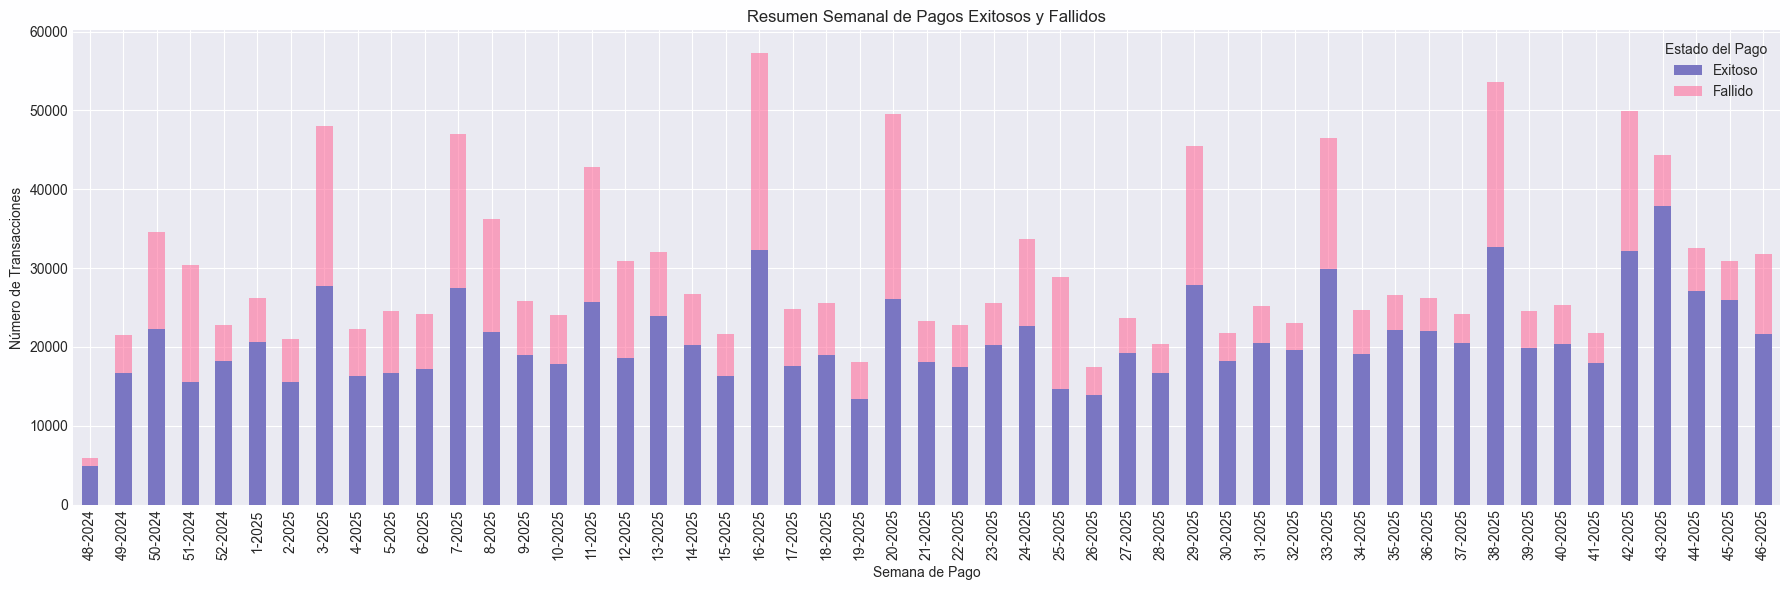

" payment_summary_sorted.plot(kind='area', stacked=True, figsize=(18, 6))\nplt.title('Resumen Semanal de Pagos Exitosos y Fallidos')\nplt.xlabel('Semana de Pago')\nplt.ylabel('Número de Transacciones')\nplt.tight_layout() # Ajusta el diseño para que las etiquetas no se corten\nlegend = plt.legend() \nlegend.set_title('Estado del Pago')\nplt.show() "

In [35]:
# 1. Agrupación y Resumen (su código original)
# Asume que 'df_merged' sigue estando cargado
payment_summary = df_filtered_not_na.groupby(['numero_semana_ano', 'pago_exitoso']).size().unstack(fill_value=0)


# --- INICIO DE LA SOLUCIÓN DE ORDENAMIENTO ---

# 2. Función de Clave de Ordenamiento
# Esta función toma una etiqueta 'W-Y' (ej. '48-2024') y la convierte en una tupla (Y, W)
# para ordenarla cronológicamente (primero por año, luego por semana).
def sort_week_year(index_value):
    try:
        # Separa la semana y el año
        parts = index_value.split('-')
        
        # Verifica que sean valores numéricos válidos
        if len(parts) == 2 and parts[0].isdigit() and parts[1].isdigit():
            week = int(parts[0])
            year = int(parts[1])
            # La tupla (año, semana) garantiza el orden cronológico
            return (year, week)
        else:
            # Coloca los valores no estándar o '<NA>' al final de la lista
            return (9999, 99)
    except:
        return (9999, 99)

# 3. Ordenar el DataFrame usando la clave personalizada
# Utilizamos la función 'sort_week_year' para ordenar los elementos del índice
payment_summary_sorted = payment_summary.loc[
    sorted(payment_summary.index, key=sort_week_year)
]

# --- FIN DE LA SOLUCIÓN DE ORDENAMIENTO ---


# 4. Generación del Gráfico (usando el DataFrame ordenado)
payment_summary_sorted.plot(kind='bar', stacked=True, figsize=(18, 6))
plt.title('Resumen Semanal de Pagos Exitosos y Fallidos')
plt.xlabel('Semana de Pago')
plt.ylabel('Número de Transacciones')
plt.xticks(rotation=90) # Asegura que las etiquetas rotadas se lean bien
plt.tight_layout() # Ajusta el diseño para que las etiquetas no se corten
legend = plt.legend() 
legend.set_title('Estado del Pago')
plt.show()


""" payment_summary_sorted.plot(kind='area', stacked=True, figsize=(18, 6))
plt.title('Resumen Semanal de Pagos Exitosos y Fallidos')
plt.xlabel('Semana de Pago')
plt.ylabel('Número de Transacciones')
plt.tight_layout() # Ajusta el diseño para que las etiquetas no se corten
legend = plt.legend() 
legend.set_title('Estado del Pago')
plt.show() """


In [78]:
# calcular tasa de exito por semana
payment_summary_sorted['tasa_exito'] = payment_summary_sorted['Exitoso'] / (payment_summary_sorted['Exitoso'] + payment_summary_sorted['Fallido'])
payment_summary_sorted['tasa_exito'] = payment_summary_sorted['tasa_exito'].fillna(0)

# promedio de tasa de exito
promedio_tasa_exito = payment_summary_sorted['tasa_exito_pct'].mean()
print("La tasa de exito promedio es: " + str(promedio_tasa_exito.round(2)))

# tasa de fallo por semana
payment_summary_sorted['tasa_fallo'] = payment_summary_sorted['Fallido'] / (payment_summary_sorted['Exitoso'] + payment_summary_sorted['Fallido'])
payment_summary_sorted['tasa_fallo'] = payment_summary_sorted['tasa_fallo'].fillna(0)


# tas de exito y de fallo en porcentaje
payment_summary_sorted['tasa_exito_pct'] = payment_summary_sorted['tasa_exito'] * 100
payment_summary_sorted['tasa_fallo_pct'] = payment_summary_sorted['tasa_fallo'] * 100

# promedio de tasa de fallo
promedio_tasa_fallo = payment_summary_sorted['tasa_fallo_pct'].mean()
print("La tasa de fallo promedio es: " + str(promedio_tasa_fallo.round(2)))

payment_summary_sorted.head()

#payment_summary_sorted.to_csv('../data/resumen_semanal_pagos_exitosos_fallidos.csv', index=True)

La tasa de exito promedio es: 72.7
La tasa de fallo promedio es: 27.3


pago_exitoso,Exitoso,Fallido,tasa_exito,tasa_exito_porcentaje,tasa_fallo,tasa_exito_pct,tasa_fallo_pct
numero_semana_ano,,,,,,,
48-2024,4953,997,0.832437,83.24,0.167563,83.243697,16.756303
49-2024,16643,4839,0.774742,77.47,0.225258,77.474164,22.525836
50-2024,22338,12301,0.644880,64.49,0.355120,64.488005,35.511995
51-2024,15602,14736,0.514273,51.43,0.485727,51.427253,48.572747
52-2024,18255,4520,0.801537,80.15,0.198463,80.153677,19.846323


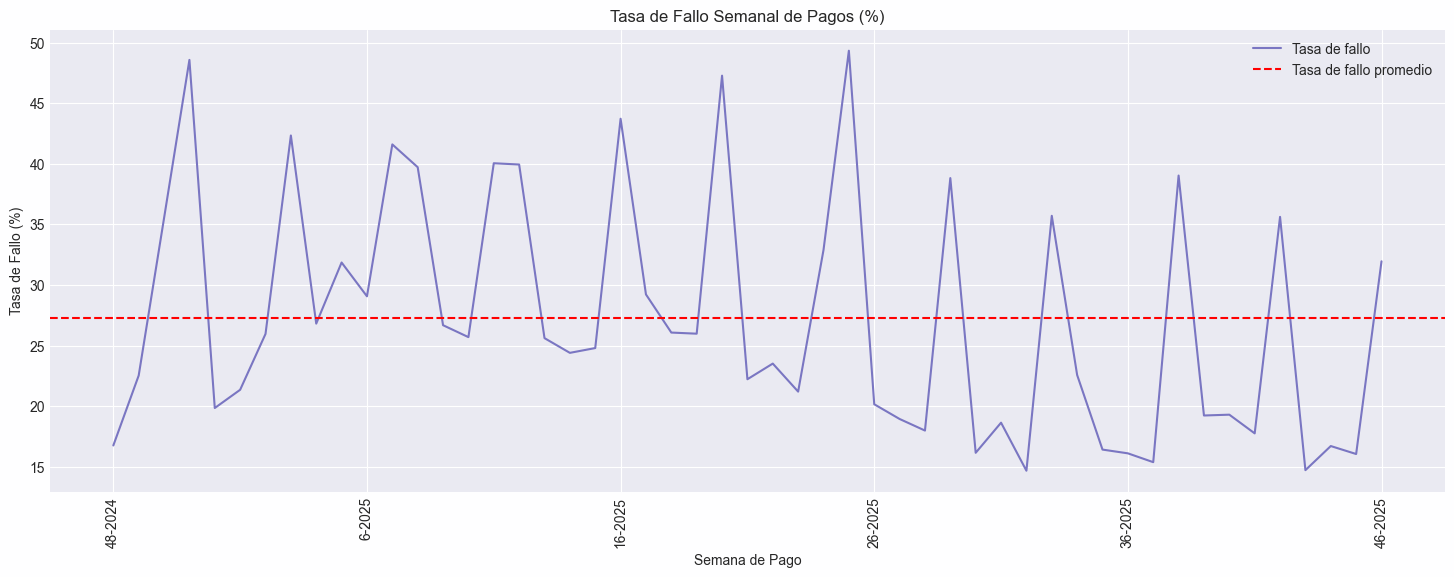

In [80]:
# graficar tasa de fallo
payment_summary_sorted['tasa_fallo_pct'].plot(kind='line', figsize=(18, 6), label='Tasa de fallo')
plt.axhline(y=promedio_tasa_fallo, color='r', linestyle='--', label='Tasa de fallo promedio')
plt.title('Tasa de Fallo Semanal de Pagos (%)')
plt.xlabel('Semana de Pago')
plt.ylabel('Tasa de Fallo (%)')
# legend x en 90 grados
plt.xticks(rotation=90)
plt.legend()
plt.show()

#### Por banco emisor: Barras de bancos vs tasa de rechazo	

C:\Users\victor.briones\AppData\Local\Temp\ipykernel_6604\1730845129.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bank_summary_sorted['Total'] = bank_summary_sorted['Exitoso'] + bank_summary_sorted['Fallido']
C:\Users\victor.briones\AppData\Local\Temp\ipykernel_6604\1730845129.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bank_summary_sorted['Exitoso (%)'] = bank_summary_sorted['Exitoso'] / bank_summary_sorted['Total']
C:\Users\victor.briones\AppData\Local\Temp\ipykernel_6604\1730845129.py:13:

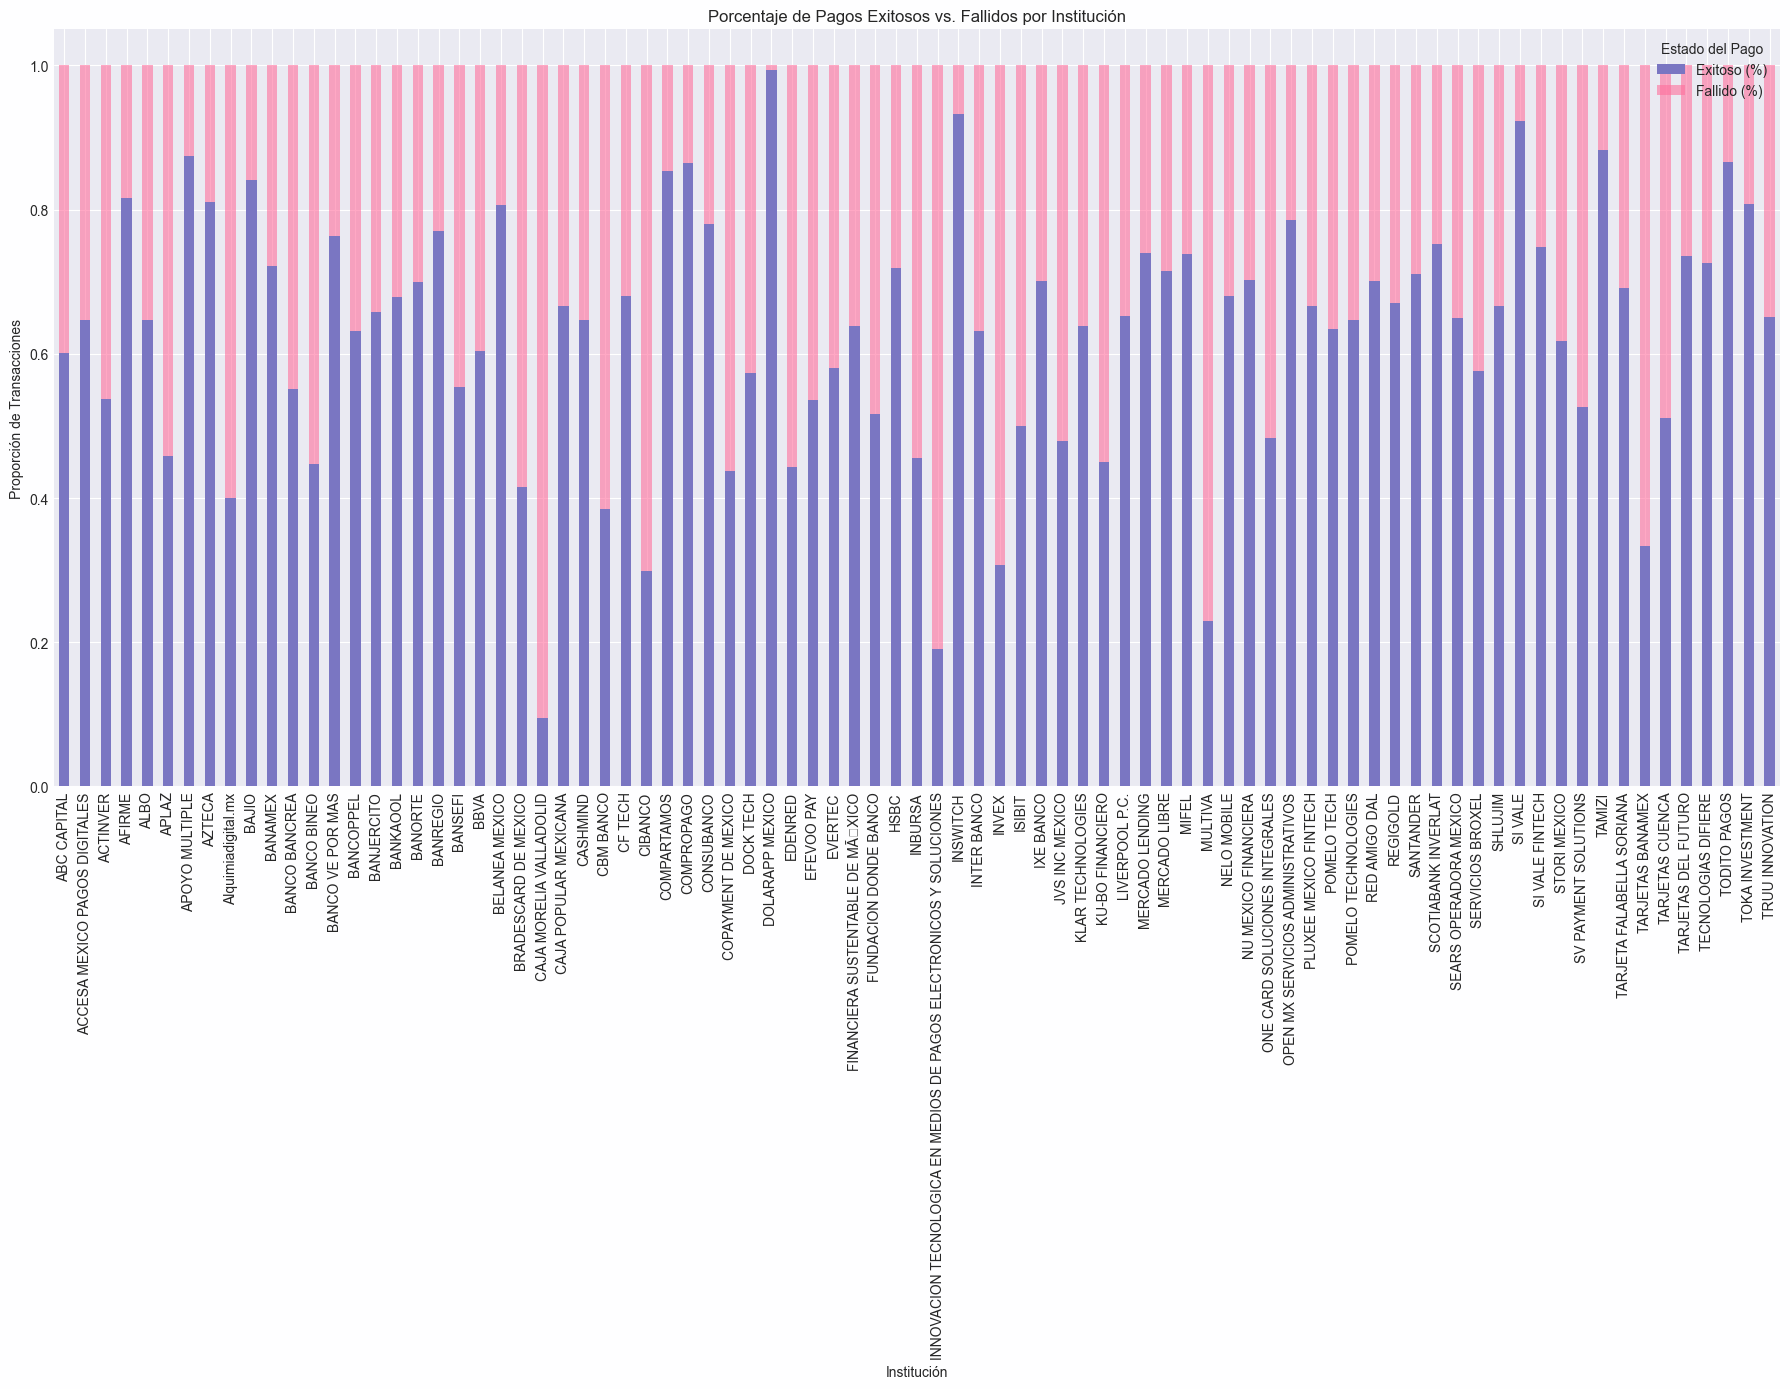

In [36]:
bank_summary = df_filtered_not_na.groupby(['institucion_bin', 'pago_exitoso']).size().unstack(fill_value=0)
# filtar por Fallido mayor a 0 y Exitoso mayor a 0
bank_summary_sorted = bank_summary[(bank_summary['Fallido'] > 0) & (bank_summary['Exitoso'] > 0)]

# 1. Suponemos que tienes una tabla con el resumen por institución:
# payment_summary = df_merged.groupby('Institución')['Estado del Pago'].value_counts().unstack(fill_value=0)

# 2. Calcular el total de transacciones por institución
bank_summary_sorted['Total'] = bank_summary_sorted['Exitoso'] + bank_summary_sorted['Fallido']

# 3. Calcular los porcentajes
bank_summary_sorted['Exitoso (%)'] = bank_summary_sorted['Exitoso'] / bank_summary_sorted['Total']
bank_summary_sorted['Fallido (%)'] = bank_summary_sorted['Fallido'] / bank_summary_sorted['Total']

# 4. Crear un DataFrame solo con los porcentajes para graficar
percentage_summary = bank_summary_sorted[['Exitoso (%)', 'Fallido (%)']]

# 5. Generar el Gráfico 100% Apiladas
percentage_summary.plot(
    kind='bar', 
    stacked=True, 
    figsize=(18, 14)
)

plt.title('Porcentaje de Pagos Exitosos vs. Fallidos por Institución')
plt.xlabel('Institución')
# El eje Y ahora representa la Proporción (0.0 a 1.0)
plt.ylabel('Proporción de Transacciones') 
plt.legend(title='Estado del Pago')

# Opcional: Rotar etiquetas del eje X para mayor legibilidad
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#### Por monto o tipo de plan: Histograma por monto	

In [37]:
# agregar columna monto real que es monto/10000
df_merged['monto_real'] = df_merged.apply(lambda row: row['monto']/10000 if row['pago_exitoso'] else 0, axis=1)
df_merged.head(1)

,numero_cuenta_bici,fecha_hora_inicializacion,fecha_hora_procesamiento,fecha_hora_completacion,id_transaccion_comerciante,monto,numero_autorizacion,id_tarjeta_credito,bin_tarjeta,pais_bin,subtipo_bin,tipo_tarjeta,codigo_razon,longitud_bin,rango_bin,id_institucion_bin,institucion_bin,producto_bin,nombre_corto_bin,tipo_pago,contexto_negocio_pago,modo_pago,resultado_pago,razon_rechazo_pago,fuente_pago,tipo_de_ciclista,tipo_de_tarjeta,resultado_tarjeta_credito,pago_exitoso,numero_semana,numero_ano,numero_semana_ano,monto_real
0,BX2Y9CGV,2024-12-01 00:00:00.179000-06:00,2024-12-01 00:00:01.037000-06:00,2024-12-01 00:00:01.037000-06:00,cyb_cnp0006637441,0,None,43a9a69f-1338-42bb-b0c3-78be26747ea3,551238,MEX,STANDARD,DEBIT,None,6.0,COMPLETO,110127.0,AZTECA,PAQUETE FAMILIAR AZTECA,-,Pre-authorization reversal,Bike // Processing credit card validation pre-...,Credit card,Accepted,None,Backend payment source,Member,Mastercard,Unknown,Exitoso,48,2024,48-2024,0.0


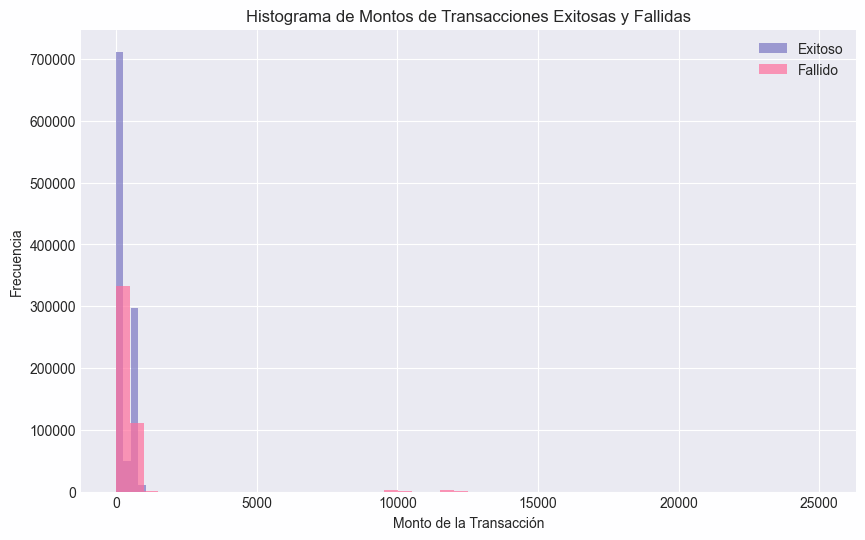

In [38]:
# Higrama de montos de transacciones exitosas y fallidas
df_successful_payments = df_merged[df_merged['pago_exitoso'] == 'Exitoso']
df_failed_payments = df_merged[df_merged['pago_exitoso'] == 'Fallido']

plt.figure(figsize=(10, 6))
plt.hist(df_successful_payments['monto_real'], bins=50, alpha=0.7, label='Exitoso')
plt.hist(df_failed_payments['monto_real'], bins=50, alpha=0.7, label='Fallido')
plt.title('Histograma de Montos de Transacciones Exitosas y Fallidas')
plt.xlabel('Monto de la Transacción')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()


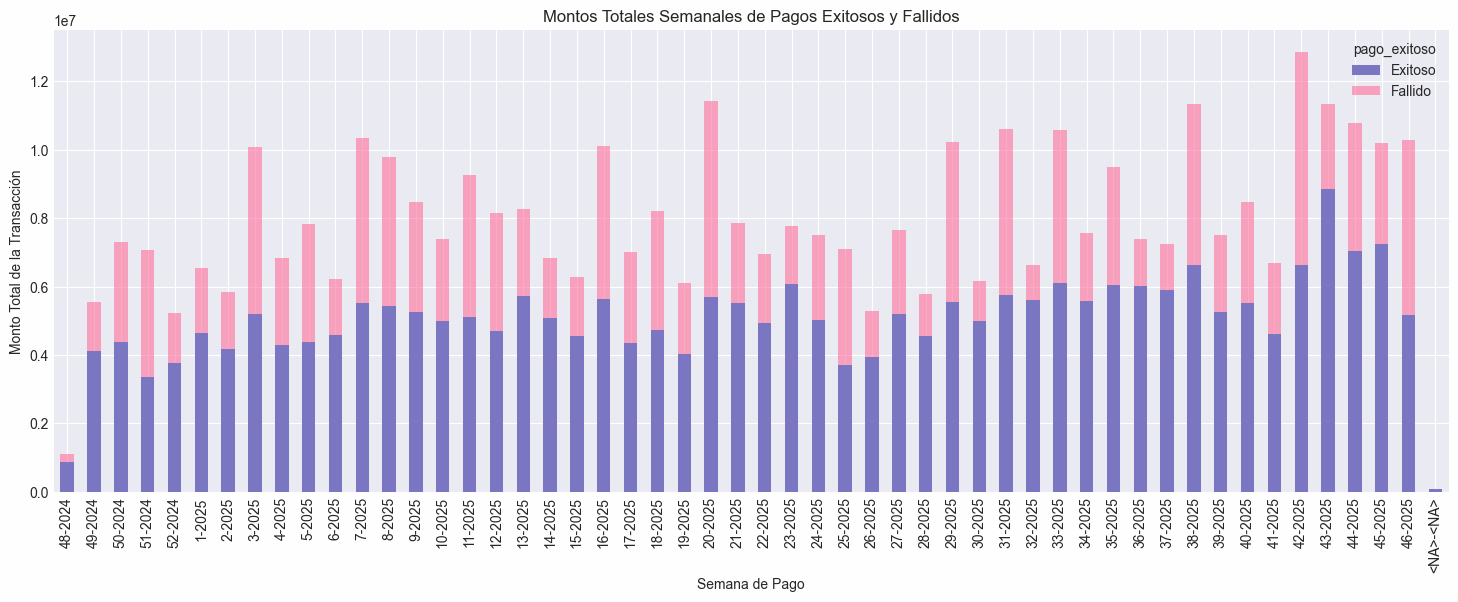

In [39]:
# grafica de barraras  de montos totales por semana y estado de pago
amount_summary = df_merged.groupby(['numero_semana_ano', 'pago_exitoso'])['monto_real'].sum().unstack(fill_value=0)
amount_summary_sorted = amount_summary.loc[
    sorted(amount_summary.index, key=sort_week_year)
]
amount_summary_sorted.plot(kind='bar', stacked=True, figsize=(18, 6))
plt.title('Montos Totales Semanales de Pagos Exitosos y Fallidos')
plt.xlabel('Semana de Pago')
plt.ylabel('Monto Total de la Transacción')
plt.show()


In [40]:
# nemro de fallidos y exitosos en la semana 48-2024
df_week_48_2024 = df_merged[df_merged['numero_semana_ano'] == '20-2025']
payment_summary_week_48_2024 = df_week_48_2024['pago_exitoso'].value_counts()
payment_summary_week_48_2024

pago_exitoso
Exitoso    26104
Fallido    23403
Name: count, dtype: int64

In [41]:
# montos fallildos y exitosos en la semana 48-2024
df_week_48_2024 = df_merged[df_merged['numero_semana_ano'] == '20-2025']
amount_summary_week_48_2024 = df_week_48_2024.groupby('pago_exitoso')['monto_real'].sum()
amount_summary_week_48_2024

pago_exitoso
Exitoso    5690953.18
Fallido    5716554.09
Name: monto_real, dtype: float64

In [42]:
print("El monto maximo es", df_merged['monto_real'].max())
print("El monto minimo es", df_merged['monto_real'].min())
print("El monto promedio es", df_merged['monto_real'].mean())
df_merged["monto_real"].describe()

El monto maximo es 25049.96
El monto minimo es 0.0
El monto promedio es 268.93791589168393


count    1.518851e+06
mean     2.689379e+02
std      6.882343e+02
min      0.000000e+00
25%      2.700000e+01
50%      1.279900e+02
75%      5.450000e+02
max      2.504996e+04
Name: monto_real, dtype: float64

In [43]:
df_merged.head()

,numero_cuenta_bici,fecha_hora_inicializacion,fecha_hora_procesamiento,fecha_hora_completacion,id_transaccion_comerciante,monto,numero_autorizacion,id_tarjeta_credito,bin_tarjeta,pais_bin,subtipo_bin,tipo_tarjeta,codigo_razon,longitud_bin,rango_bin,id_institucion_bin,institucion_bin,producto_bin,nombre_corto_bin,tipo_pago,contexto_negocio_pago,modo_pago,resultado_pago,razon_rechazo_pago,fuente_pago,tipo_de_ciclista,tipo_de_tarjeta,resultado_tarjeta_credito,pago_exitoso,numero_semana,numero_ano,numero_semana_ano,monto_real
0,BX2Y9CGV,2024-12-01 00:00:00.179000-06:00,2024-12-01 00:00:01.037000-06:00,2024-12-01 00:00:01.037000-06:00,cyb_cnp0006637441,0,None,43a9a69f-1338-42bb-b0c3-78be26747ea3,551238,MEX,STANDARD,DEBIT,None,6.0,COMPLETO,110127.0,AZTECA,PAQUETE FAMILIAR AZTECA,-,Pre-authorization reversal,Bike // Processing credit card validation pre-...,Credit card,Accepted,None,Backend payment source,Member,Mastercard,Unknown,Exitoso,48,2024,48-2024,0.0
1,Z8JYWXGN,2024-12-01 00:00:01.096000-06:00,2024-12-01 00:00:01.998000-06:00,2024-12-01 00:00:01.998000-06:00,cyb_cnp0006637442,0,None,e9bc54d2-d8d7-4b6b-a821-6246c8035e43,418914,MEX,CLASSIC,DEBIT,None,6.0,COMPLETO,110072.0,BANORTE,IXE/VISA/DEBITO,IXE DEBITO,Pre-authorization reversal,Bike // Processing credit card validation pre-...,Credit card,Accepted,None,Backend payment source,Member,Visa,Unknown,Exitoso,48,2024,48-2024,0.0
2,BX2Y9CGV,2024-12-01 00:00:02.064000-06:00,2024-12-01 00:00:02.864000-06:00,2024-12-01 00:00:02.864000-06:00,cyb_cnp0006637443,0,None,43a9a69f-1338-42bb-b0c3-78be26747ea3,551238,MEX,STANDARD,DEBIT,None,6.0,COMPLETO,110127.0,AZTECA,PAQUETE FAMILIAR AZTECA,-,Pre-authorization reversal,Bike // Processing credit card validation pre-...,Credit card,Accepted,None,Backend payment source,Member,Mastercard,Unknown,Exitoso,48,2024,48-2024,0.0
3,BX2Y9CGV,2024-12-01 00:00:02.942000-06:00,2024-12-01 00:00:03.817000-06:00,2024-12-01 00:00:03.817000-06:00,cyb_cnp0006637444,0,None,43a9a69f-1338-42bb-b0c3-78be26747ea3,551238,MEX,STANDARD,DEBIT,None,6.0,COMPLETO,110127.0,AZTECA,PAQUETE FAMILIAR AZTECA,-,Pre-authorization reversal,Bike // Processing credit card validation pre-...,Credit card,Accepted,None,Backend payment source,Member,Mastercard,Unknown,Exitoso,48,2024,48-2024,0.0
4,8YEV4RHB,2024-12-01 00:00:03.893000-06:00,2024-12-01 00:00:04.650000-06:00,2024-12-01 00:00:04.650000-06:00,cyb_cnp0006637445,0,None,fce27dc2-d518-413a-8610-a89b5f497017,481516,MEX,None,CREDIT,None,6.0,COMPLETO,210012.0,BBVA,TJ DIGITAL DEB AFFLUENT,TJ DIG AFT,Pre-authorization reversal,Bike // Processing credit card validation pre-...,Credit card,Accepted,None,Backend payment source,Member,Visa,Unknown,Exitoso,48,2024,48-2024,0.0


C:\Users\victor.briones\AppData\Local\Temp\ipykernel_6604\4148657691.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rango_payment_summary = df_merged.groupby(['rango_monto_real', 'pago_exitoso']).size().unstack(fill_value=0)


<Figure size 1000x600 with 0 Axes>

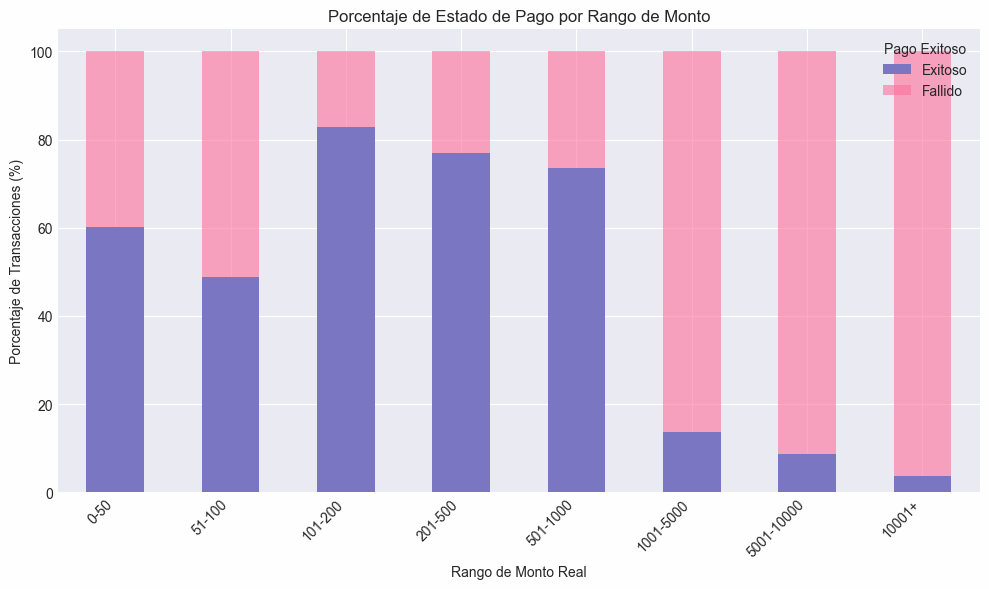

In [44]:
# Crear rangos de monto_real
bins = [0, 50, 100, 200, 500, 1000, 5000, 10000, np.inf]
labels = ['0-50', '51-100', '101-200', '201-500', '501-1000', '1001-5000', '5001-10000', '10001+']
df_merged['rango_monto_real'] = pd.cut(df_merged['monto_real'], bins=bins, labels=labels, right=False)
df_merged.head()

# 1. Calcular el conteo de rangos de monto real por estado de pago
rango_payment_summary = df_merged.groupby(['rango_monto_real', 'pago_exitoso']).size().unstack(fill_value=0)

# 2. Calcular las proporciones (Porcentajes) para el gráfico 100% apilado
# Sumar a lo largo de las filas (axis=1) para obtener el total de transacciones por rango
row_totals = rango_payment_summary.sum(axis=1)

# Dividir cada celda por su total de fila correspondiente y multiplicar por 100
rango_payment_summary_100 = rango_payment_summary.div(row_totals, axis=0) * 100

# 3. Graficar la tabla de porcentajes
plt.figure(figsize=(10, 6))
rango_payment_summary_100.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Porcentaje de Estado de Pago por Rango de Monto')
plt.xlabel('Rango de Monto Real')
plt.ylabel('Porcentaje de Transacciones (%)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Pago Exitoso')
plt.tight_layout()
plt.show()

In [45]:
rango_payment_summary

pago_exitoso,Exitoso,Fallido
rango_monto_real,,
0-50,255770,168608
51-100,61297,64277
101-200,355580,73707
201-500,87773,26124
501-1000,308722,110728
1001-5000,134,843
5001-10000,6,63
10001+,191,5028


#### Por canal (App/Web)

In [46]:
origen_pago = df_merged.copy()
origen_pago.head()

,numero_cuenta_bici,fecha_hora_inicializacion,fecha_hora_procesamiento,fecha_hora_completacion,id_transaccion_comerciante,monto,numero_autorizacion,id_tarjeta_credito,bin_tarjeta,pais_bin,subtipo_bin,tipo_tarjeta,codigo_razon,longitud_bin,rango_bin,id_institucion_bin,institucion_bin,producto_bin,nombre_corto_bin,tipo_pago,contexto_negocio_pago,modo_pago,resultado_pago,razon_rechazo_pago,fuente_pago,tipo_de_ciclista,tipo_de_tarjeta,resultado_tarjeta_credito,pago_exitoso,numero_semana,numero_ano,numero_semana_ano,monto_real,rango_monto_real
0,BX2Y9CGV,2024-12-01 00:00:00.179000-06:00,2024-12-01 00:00:01.037000-06:00,2024-12-01 00:00:01.037000-06:00,cyb_cnp0006637441,0,None,43a9a69f-1338-42bb-b0c3-78be26747ea3,551238,MEX,STANDARD,DEBIT,None,6.0,COMPLETO,110127.0,AZTECA,PAQUETE FAMILIAR AZTECA,-,Pre-authorization reversal,Bike // Processing credit card validation pre-...,Credit card,Accepted,None,Backend payment source,Member,Mastercard,Unknown,Exitoso,48,2024,48-2024,0.0,0-50
1,Z8JYWXGN,2024-12-01 00:00:01.096000-06:00,2024-12-01 00:00:01.998000-06:00,2024-12-01 00:00:01.998000-06:00,cyb_cnp0006637442,0,None,e9bc54d2-d8d7-4b6b-a821-6246c8035e43,418914,MEX,CLASSIC,DEBIT,None,6.0,COMPLETO,110072.0,BANORTE,IXE/VISA/DEBITO,IXE DEBITO,Pre-authorization reversal,Bike // Processing credit card validation pre-...,Credit card,Accepted,None,Backend payment source,Member,Visa,Unknown,Exitoso,48,2024,48-2024,0.0,0-50
2,BX2Y9CGV,2024-12-01 00:00:02.064000-06:00,2024-12-01 00:00:02.864000-06:00,2024-12-01 00:00:02.864000-06:00,cyb_cnp0006637443,0,None,43a9a69f-1338-42bb-b0c3-78be26747ea3,551238,MEX,STANDARD,DEBIT,None,6.0,COMPLETO,110127.0,AZTECA,PAQUETE FAMILIAR AZTECA,-,Pre-authorization reversal,Bike // Processing credit card validation pre-...,Credit card,Accepted,None,Backend payment source,Member,Mastercard,Unknown,Exitoso,48,2024,48-2024,0.0,0-50
3,BX2Y9CGV,2024-12-01 00:00:02.942000-06:00,2024-12-01 00:00:03.817000-06:00,2024-12-01 00:00:03.817000-06:00,cyb_cnp0006637444,0,None,43a9a69f-1338-42bb-b0c3-78be26747ea3,551238,MEX,STANDARD,DEBIT,None,6.0,COMPLETO,110127.0,AZTECA,PAQUETE FAMILIAR AZTECA,-,Pre-authorization reversal,Bike // Processing credit card validation pre-...,Credit card,Accepted,None,Backend payment source,Member,Mastercard,Unknown,Exitoso,48,2024,48-2024,0.0,0-50
4,8YEV4RHB,2024-12-01 00:00:03.893000-06:00,2024-12-01 00:00:04.650000-06:00,2024-12-01 00:00:04.650000-06:00,cyb_cnp0006637445,0,None,fce27dc2-d518-413a-8610-a89b5f497017,481516,MEX,None,CREDIT,None,6.0,COMPLETO,210012.0,BBVA,TJ DIGITAL DEB AFFLUENT,TJ DIG AFT,Pre-authorization reversal,Bike // Processing credit card validation pre-...,Credit card,Accepted,None,Backend payment source,Member,Visa,Unknown,Exitoso,48,2024,48-2024,0.0,0-50


In [47]:
# filtrar por fuente_pago Website y Mobile
origen_pago_filtered = origen_pago[origen_pago['fuente_pago'].isin(['Website', 'Mobile'])]
origen_pago_filtered.head()

,numero_cuenta_bici,fecha_hora_inicializacion,fecha_hora_procesamiento,fecha_hora_completacion,id_transaccion_comerciante,monto,numero_autorizacion,id_tarjeta_credito,bin_tarjeta,pais_bin,subtipo_bin,tipo_tarjeta,codigo_razon,longitud_bin,rango_bin,id_institucion_bin,institucion_bin,producto_bin,nombre_corto_bin,tipo_pago,contexto_negocio_pago,modo_pago,resultado_pago,razon_rechazo_pago,fuente_pago,tipo_de_ciclista,tipo_de_tarjeta,resultado_tarjeta_credito,pago_exitoso,numero_semana,numero_ano,numero_semana_ano,monto_real,rango_monto_real
43,K6A2GK44,2024-12-01 00:00:59.108000-06:00,2024-12-01 00:01:00.094000-06:00,2024-12-01 00:01:00.094000-06:00,cyb_cnp0006637483,5450000,None,16f7b6c2-14d2-4efd-b70f-1a77e1131d77,481516,MEX,None,CREDIT,EXPIRED_CARD,6.0,COMPLETO,210012.0,BBVA,TJ DIGITAL DEB AFFLUENT,TJ DIG AFT,Purchase,Bike // Member subscription purchase,Credit card,Refused,None,Website,NaN,Visa,Unknown,Fallido,48,2024,48-2024,545.00,501-1000
51,K6A2GK44,2024-12-01 00:01:21.488000-06:00,2024-12-01 00:01:22.560000-06:00,2024-12-01 00:01:22.560000-06:00,cyb_cnp0006637491,5450000,None,16f7b6c2-14d2-4efd-b70f-1a77e1131d77,481516,MEX,None,CREDIT,EXPIRED_CARD,6.0,COMPLETO,210012.0,BBVA,TJ DIGITAL DEB AFFLUENT,TJ DIG AFT,Purchase,Bike // Member subscription purchase,Credit card,Refused,None,Website,NaN,Visa,Unknown,Fallido,48,2024,48-2024,545.00,501-1000
52,K6A2GK44,2024-12-01 00:01:52.816000-06:00,2024-12-01 00:01:53.847000-06:00,2024-12-01 00:01:53.847000-06:00,cyb_cnp0006637492,1229900,None,16f7b6c2-14d2-4efd-b70f-1a77e1131d77,481516,MEX,None,CREDIT,EXPIRED_CARD,6.0,COMPLETO,210012.0,BBVA,TJ DIGITAL DEB AFFLUENT,TJ DIG AFT,Purchase,Bike // Member subscription purchase,Credit card,Refused,None,Mobile,NaN,Visa,Unknown,Fallido,48,2024,48-2024,122.99,101-200
53,3ZMPZ2HF,2024-12-01 00:02:01.314000-06:00,2024-12-01 00:02:02.426000-06:00,2024-12-01 00:02:02.426000-06:00,cyb_cnp0006637493,5450000,None,318b070e-57b1-4f11-8956-eb22e0fb9c74,481516,MEX,None,CREDIT,None,6.0,COMPLETO,210012.0,BBVA,TJ DIGITAL DEB AFFLUENT,TJ DIG AFT,Purchase,Bike // Member subscription purchase,Credit card,Accepted,None,Mobile,NaN,Visa,Unknown,Exitoso,48,2024,48-2024,545.00,501-1000
55,K6A2GK44,2024-12-01 00:02:13.080000-06:00,2024-12-01 00:02:14.094000-06:00,2024-12-01 00:02:14.094000-06:00,cyb_cnp0006637495,1229900,None,16f7b6c2-14d2-4efd-b70f-1a77e1131d77,481516,MEX,None,CREDIT,EXPIRED_CARD,6.0,COMPLETO,210012.0,BBVA,TJ DIGITAL DEB AFFLUENT,TJ DIG AFT,Purchase,Bike // Member subscription purchase,Credit card,Refused,None,Mobile,NaN,Visa,Unknown,Fallido,48,2024,48-2024,122.99,101-200


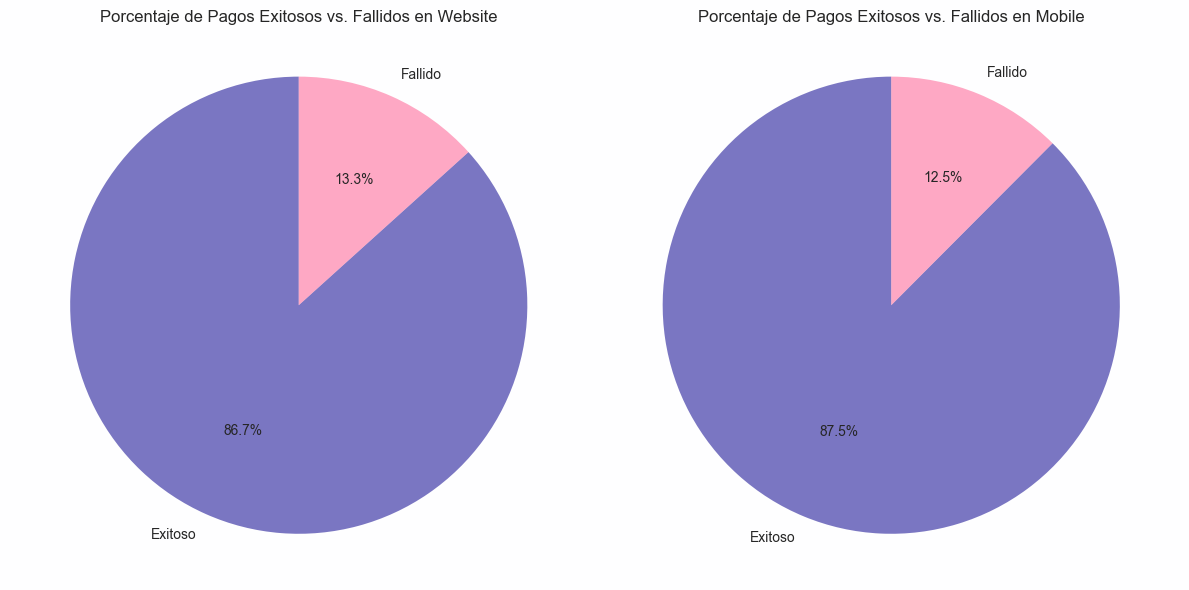

In [48]:
# Filtar por fuente_pago es website
website_payments = origen_pago_filtered[origen_pago_filtered['fuente_pago'] == 'Website']
mobile_payments = origen_pago_filtered[origen_pago_filtered['fuente_pago'] == 'Mobile']

# Graficar en grafica de pastel el porcentaje de pagos exitosos y fallidos en website_payments
website_payment_summary = website_payments['pago_exitoso'].value_counts()

# Graficar en grafica de pastel el porcentaje de pagos exitosos y fallidos en mobile_payments
mobile_payment_summary = mobile_payments['pago_exitoso'].value_counts()

# Crear una figura con dos subplots (1 fila, 2 columnas)
fig, axes = plt.subplots(1, 2, figsize=(12, 6)) # figsize ajustado para ambas gráficas

# Gráfica de pastel para Website
axes[0].pie(website_payment_summary, autopct='%1.1f%%', startangle=90, labels=website_payment_summary.index)
axes[0].set_title('Porcentaje de Pagos Exitosos vs. Fallidos en Website')
axes[0].axis('equal') # Asegura que el pastel sea un círculo.

# Gráfica de pastel para Mobile
axes[1].pie(mobile_payment_summary, autopct='%1.1f%%', startangle=90, labels=mobile_payment_summary.index)
axes[1].set_title('Porcentaje de Pagos Exitosos vs. Fallidos en Mobile')
axes[1].axis('equal') # Asegura que el pastel sea un círculo.

# Ajustar el diseño para evitar superposiciones
plt.tight_layout()

# Guardar la figura combinada
plt.savefig('pagos_website_vs_mobile.png')

plt.show()

In [49]:
# exportar a csv solo 3 filas
origen_pago_filtered.head(3).to_csv('origen_pago_filtered_sample.csv', index=False)

#### Reintentos por usuario: Gráfico de dispersión (# intentos vs probabilidad de éxito)

In [50]:
# agrupar por numero_cuenta_bici agrupar por pago_exitoso y una columna de total
retries_summary = df_merged.groupby(['numero_cuenta_bici', 'pago_exitoso']).size().unstack(fill_value=0)
retries_summary['total'] = retries_summary.sum(axis=1)
retries_summary.head()

pago_exitoso,Exitoso,Fallido,total
numero_cuenta_bici,,,
100017,5,0,5
100088,1,0,1
10017,3,4,7
100265,2,0,2
100313,5,1,6


In [51]:
retries_summary["probabilidad_exito"] = retries_summary['Exitoso'] / retries_summary['total']
retries_summary.head()

pago_exitoso,Exitoso,Fallido,total,probabilidad_exito
numero_cuenta_bici,,,,
100017,5,0,5,1.000000
100088,1,0,1,1.000000
10017,3,4,7,0.428571
100265,2,0,2,1.000000
100313,5,1,6,0.833333


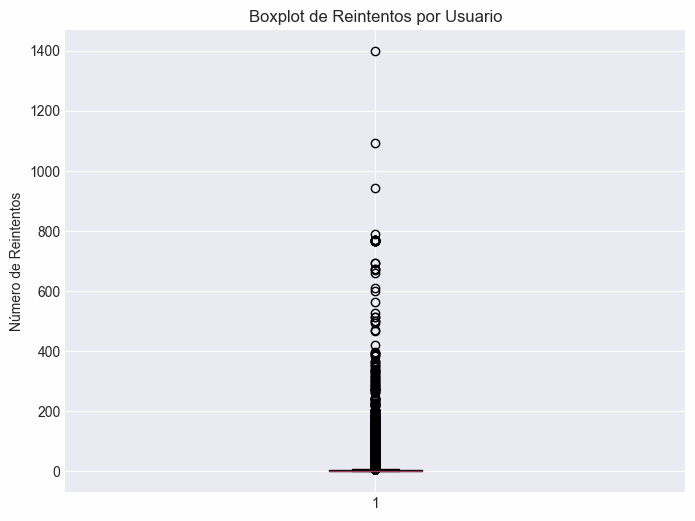

In [52]:
# boxplot de total de reintentos
plt.figure(figsize=(8, 6))
plt.boxplot(retries_summary['total'], vert=True, patch_artist=True)
plt.title('Boxplot de Reintentos por Usuario')
plt.ylabel('Número de Reintentos')
plt.show()

##### Limpieza de outliers

In [53]:
z_scores = stats.zscore(retries_summary['total'])

# Identificando outliers con un umbral de Z-score, por ejemplo, 3
umbral = 3
outliers = retries_summary[(z_scores < -umbral) | (z_scores > umbral)]
# Mostrando outliers identificados
print("Outliers identificados con un umbral de Z-score de 3:")
# print(outliers)
outliers

Outliers identificados con un umbral de Z-score de 3:


pago_exitoso,Exitoso,Fallido,total,probabilidad_exito
numero_cuenta_bici,,,,
22Q5BRDR,0,99,99,0.000000
23XRUFPA,12,42,54,0.222222
2429SP5P,10,101,111,0.090090
243119,69,1,70,0.985714
24VGS65P,0,63,63,0.000000
...,...,...,...,...
ZYDRW8MD,51,2,53,0.962264
ZYHCMGTN,24,23,47,0.510638
ZYNQJMBP,7,30,37,0.189189


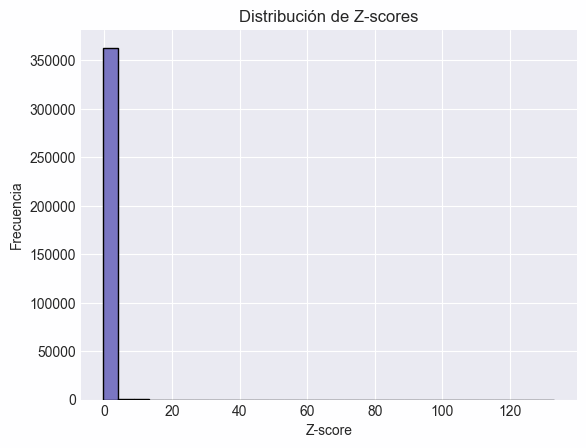

In [54]:
plt.hist(z_scores, bins=30, edgecolor='k')
plt.title('Distribución de Z-scores')
plt.xlabel('Z-score')
plt.ylabel('Frecuencia')
plt.show()

In [55]:
# Detectar outliers usando el método IQR
Q1 = retries_summary['total'].quantile(0.25)
Q3 = retries_summary['total'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para considerar un dato como outlier
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

df_sin_outliers = retries_summary[(retries_summary['total'] >= lower_limit) & (retries_summary['total'] <= upper_limit)]

print("Número de outliers detectados:", len(outliers))
print("Número de registros después de remover outliers:", len(df_sin_outliers))

Número de outliers detectados: 2061
Número de registros después de remover outliers: 324069


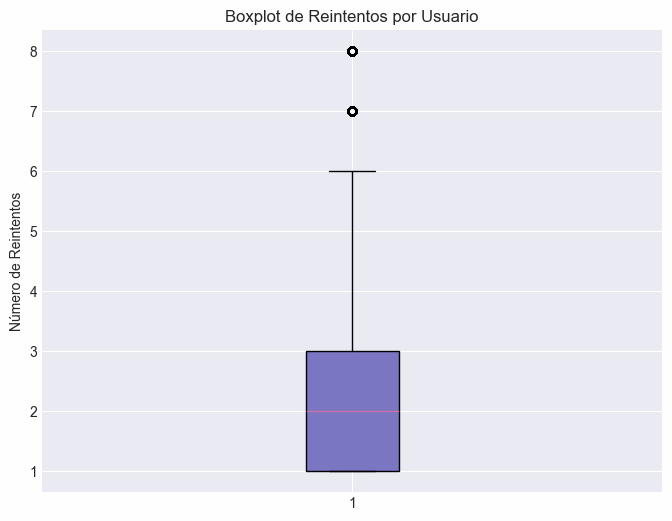

In [56]:
# boxplot de total de reintentos
plt.figure(figsize=(8, 6))
plt.boxplot(df_sin_outliers['total'], vert=True, patch_artist=True)
plt.title('Boxplot de Reintentos por Usuario')
plt.ylabel('Número de Reintentos')
plt.show()

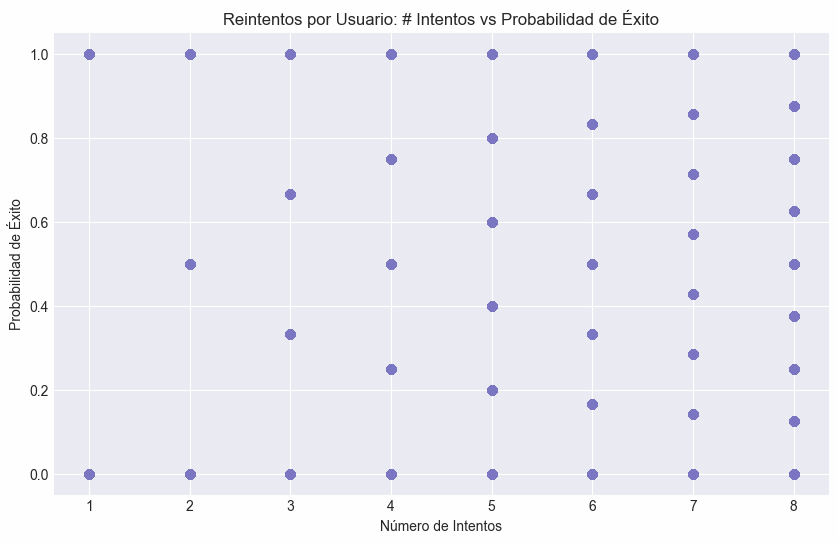

In [57]:
# grafica de dispersión (# intentos vs probabilidad de éxito)
plt.figure(figsize=(10, 6))
plt.scatter(df_sin_outliers['total'], df_sin_outliers['probabilidad_exito'], alpha=0.5)
plt.title('Reintentos por Usuario: # Intentos vs Probabilidad de Éxito')
plt.xlabel('Número de Intentos')
plt.ylabel('Probabilidad de Éxito')
plt.grid(True)
plt.show()

In [58]:
x = df_sin_outliers['total']
y = df_sin_outliers['probabilidad_exito']
correlation = np.corrcoef(x, y)[0, 1]

print(f'Correlación entre Número de Intentos y Probabilidad de Éxito: {correlation:.2f}')

Correlación entre Número de Intentos y Probabilidad de Éxito: -0.12


#### Tiempos de respuesta: Línea temporal de latencia de pasarela	

In [59]:
df_merged.head(1)

,numero_cuenta_bici,fecha_hora_inicializacion,fecha_hora_procesamiento,fecha_hora_completacion,id_transaccion_comerciante,monto,numero_autorizacion,id_tarjeta_credito,bin_tarjeta,pais_bin,subtipo_bin,tipo_tarjeta,codigo_razon,longitud_bin,rango_bin,id_institucion_bin,institucion_bin,producto_bin,nombre_corto_bin,tipo_pago,contexto_negocio_pago,modo_pago,resultado_pago,razon_rechazo_pago,fuente_pago,tipo_de_ciclista,tipo_de_tarjeta,resultado_tarjeta_credito,pago_exitoso,numero_semana,numero_ano,numero_semana_ano,monto_real,rango_monto_real
0,BX2Y9CGV,2024-12-01 00:00:00.179000-06:00,2024-12-01 00:00:01.037000-06:00,2024-12-01 00:00:01.037000-06:00,cyb_cnp0006637441,0,None,43a9a69f-1338-42bb-b0c3-78be26747ea3,551238,MEX,STANDARD,DEBIT,None,6.0,COMPLETO,110127.0,AZTECA,PAQUETE FAMILIAR AZTECA,-,Pre-authorization reversal,Bike // Processing credit card validation pre-...,Credit card,Accepted,None,Backend payment source,Member,Mastercard,Unknown,Exitoso,48,2024,48-2024,0.0,0-50


In [60]:
# filtrar donde la columna exitoso es igual a 0
error_type_sorted_0 = df_merged[df_merged['exitoso'] == 0]
error_type_sorted_0.head(1)

KeyError: 'exitoso'

In [ ]:
payment_error_type_main = error_type_sorted_0.groupby(['numero_semana_ano', 'razon_rechazo_pago']).size().unstack(fill_value=0)
payment_error_type_main.head()

razon_rechazo_pago,BIN validation failed,Invalid billing informations,Payment too slow,Processing error,Suspected fraud (Sift Science)
numero_semana_ano,,,,,
1-2025,135,0,2,548,5532
10-2025,85,0,0,1266,3321
11-2025,158,6,1,1334,3339
12-2025,127,3,2,1304,3244
13-2025,133,0,0,1421,6964


In [ ]:
# 2. Función de Clave de Ordenamiento
# Esta función toma una etiqueta 'W-Y' (ej. '48-2024') y la convierte en una tupla (Y, W)
# para ordenarla cronológicamente (primero por año, luego por semana).
def sort_week_year(index_value):
    try:
        # Separa la semana y el año
        parts = index_value.split('-')
        
        # Verifica que sean valores numéricos válidos
        if len(parts) == 2 and parts[0].isdigit() and parts[1].isdigit():
            week = int(parts[0])
            year = int(parts[1])
            # La tupla (año, semana) garantiza el orden cronológico
            return (year, week)
        else:
            # Coloca los valores no estándar o '<NA>' al final de la lista
            return (9999, 99)
    except:
        return (9999, 99)

# 3. Ordenar el DataFrame usando la clave personalizada
# Utilizamos la función 'sort_week_year' para ordenar los elementos del índice
error_type_sorted_ = payment_error_type_main.loc[
    sorted(payment_error_type_main.index, key=sort_week_year)
]
error_type_sorted_

razon_rechazo_pago,BIN validation failed,Invalid billing informations,Payment too slow,Processing error,Suspected fraud (Sift Science)
numero_semana_ano,,,,,
48-2024,32,0,0,81,1652
49-2024,75,0,1,485,4408
50-2024,98,4,3,583,3354
51-2024,96,0,0,500,3126
52-2024,104,2,0,553,6044
1-2025,135,0,2,548,5532
2-2025,84,9,2,259,3343
3-2025,157,0,5,280,4095
4-2025,130,0,0,359,3053


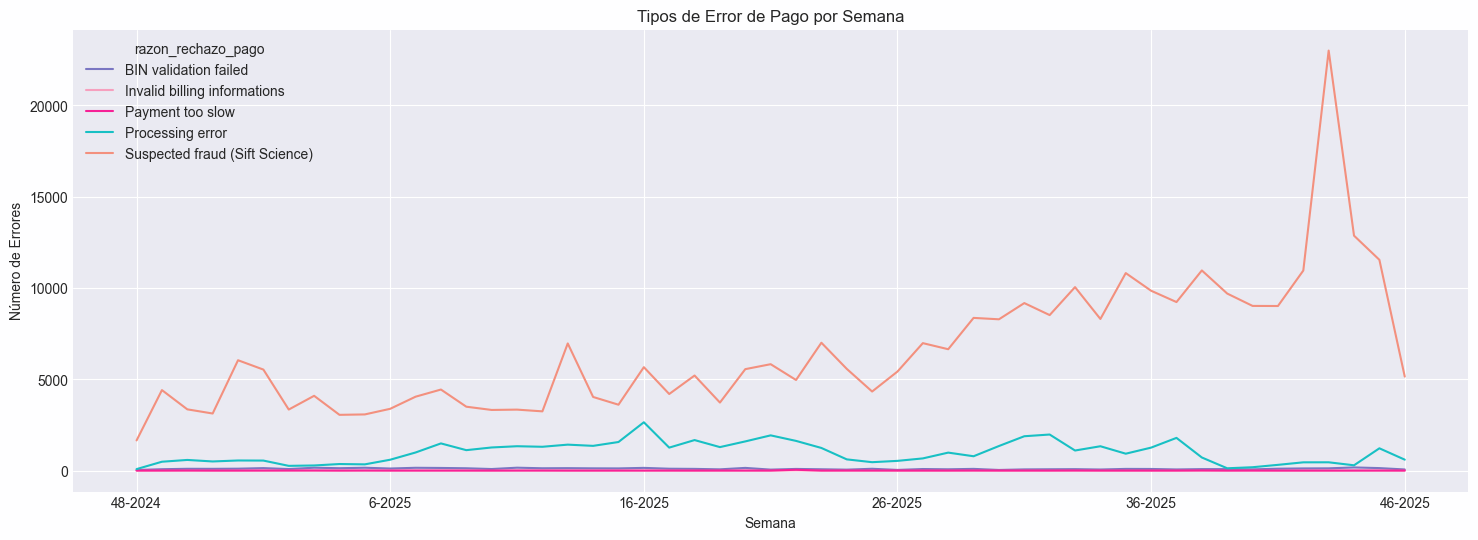

In [ ]:
# grafica de lineas agrupado por numero_ano
error_type_sorted_.plot(kind='line', stacked=False, figsize=(18, 6))
plt.title('Tipos de Error de Pago por Semana')
plt.xlabel('Semana')
plt.ylabel('Número de Errores')
plt.show()

#### Códigos de error: Gráfico de Pareto (Top 10 códigos)

In [ ]:
df_merged["codigo_razon"].unique()

array([None, 'PROCESSOR_DECLINED', 'UNAUTHORIZED_CARD',
       'INSUFFICIENT_FUND', 'EXPIRED_CARD', 'STOLEN_LOST_CARD',
       'PROCESSOR_ERROR', 'INVALID_ACCOUNT', 'CONTACT_PROCESSOR',
       'EXCEEDS_CREDIT_LIMIT', 'CV_FAILED',
       'ALLOWABLE_PIN_RETRIES_EXCEEDED', 'INVALID_CVN',
       'DECISION_PROFILE_REJECT', 'GENERAL_DECLINE'], dtype=object)

In [ ]:
# top 10 códigos de error
top_10_error_codes = df_merged['codigo_razon'].value_counts().head(10)
top_10_error_codes

codigo_razon
INSUFFICIENT_FUND                 107531
ALLOWABLE_PIN_RETRIES_EXCEEDED     87275
PROCESSOR_DECLINED                 78555
DECISION_PROFILE_REJECT            56453
UNAUTHORIZED_CARD                  53000
STOLEN_LOST_CARD                   17266
PROCESSOR_ERROR                    16088
EXPIRED_CARD                       12344
INVALID_ACCOUNT                    10965
CONTACT_PROCESSOR                   2522
Name: count, dtype: int64

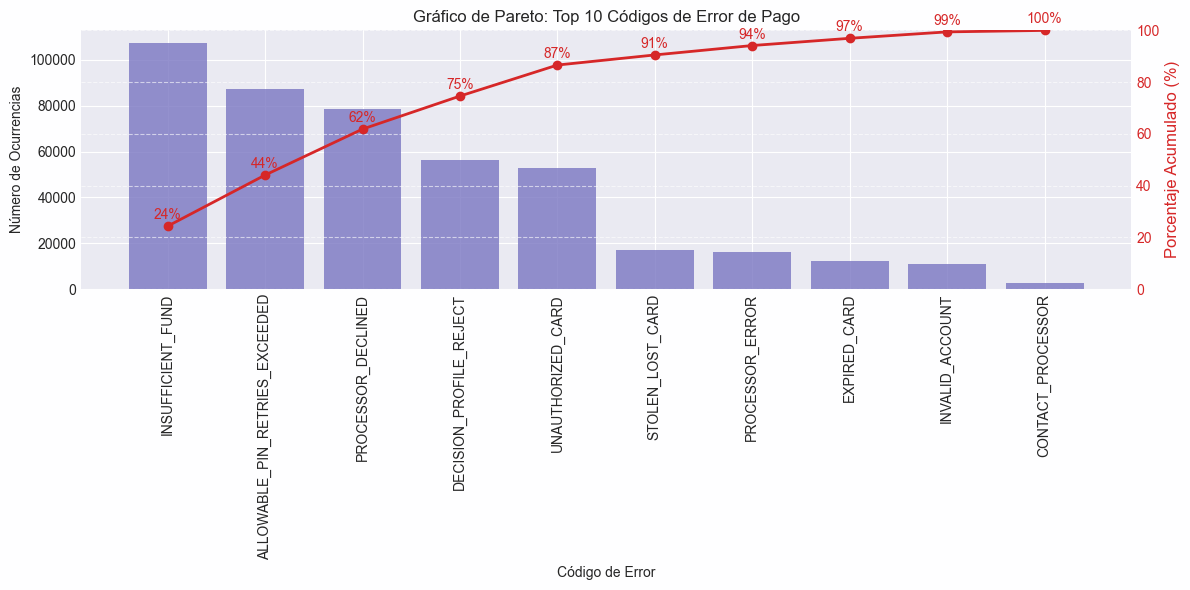

In [ ]:

# 1. Cálculo del Porcentaje Acumulado
total_occurrences = top_10_error_codes.sum()
cumulative_sum = top_10_error_codes.cumsum()
cumulative_percentage = (cumulative_sum / total_occurrences) * 100

# 2. Creación de la figura y los ejes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Eje Principal (Barras - Ocurrencias)
ax1.bar(
    top_10_error_codes.index,
    top_10_error_codes.values,
    alpha=0.8
)
ax1.set_xlabel('Código de Error')
ax1.set_ylabel('Número de Ocurrencias')
ax1.tick_params(axis='y')
ax1.tick_params(axis='x', rotation=90)

# Eje Secundario (Línea - Porcentaje Acumulado)
ax2 = ax1.twinx()  # Crea un segundo eje Y que comparte el mismo eje X
ax2.plot(
    top_10_error_codes.index,
    cumulative_percentage,
    color='tab:red',
    marker='o',
    linestyle='-',
    linewidth=2
)
ax2.set_ylabel('Porcentaje Acumulado (%)', color='tab:red', fontsize=12)
ax2.tick_params(axis='y', labelcolor='tab:red')
ax2.set_ylim(0, 100) # El eje del porcentaje siempre va de 0 a 100

# Opcional: Agregar etiquetas de porcentaje en la línea
for i, (p, c) in enumerate(zip(cumulative_percentage, top_10_error_codes.index)):
    ax2.annotate(f'{p:.0f}%', (c, p), textcoords="offset points", xytext=(0, 5), ha='center', color='tab:red')

# Título y Ajustes
plt.title('Gráfico de Pareto: Top 10 Códigos de Error de Pago')
fig.tight_layout() # Asegura que no haya superposición
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.show()

#### Pérdidas estimadas: Gráfico de barras apiladas (rechazos × valor $)

In [ ]:
df_merged.head(1)

,numero_cuenta_bici,fecha_hora_inicializacion,fecha_hora_procesamiento,fecha_hora_completacion,id_transaccion_comerciante,monto,numero_autorizacion,id_tarjeta_credito,bin_tarjeta,pais_bin,subtipo_bin,tipo_tarjeta,codigo_razon,longitud_bin,rango_bin,id_institucion_bin,institucion_bin,producto_bin,nombre_corto_bin,tipo_pago,contexto_negocio_pago,modo_pago,resultado_pago,razon_rechazo_pago,fuente_pago,tipo_de_ciclista,tipo_de_tarjeta,resultado_tarjeta_credito,pago_exitoso,numero_semana,numero_ano,numero_semana_ano,monto_real,rango_monto_real,exitoso
0,BX2Y9CGV,2024-12-01 00:00:00.179000-06:00,2024-12-01 00:00:01.037000-06:00,2024-12-01 00:00:01.037000-06:00,cyb_cnp0006637441,0,None,43a9a69f-1338-42bb-b0c3-78be26747ea3,551238,MEX,STANDARD,DEBIT,None,6.0,COMPLETO,110127.0,AZTECA,PAQUETE FAMILIAR AZTECA,-,Pre-authorization reversal,Bike // Processing credit card validation pre-...,Credit card,Accepted,None,Backend payment source,Member,Mastercard,Unknown,Exitoso,48,2024,48-2024,0.0,0-50,1


In [ ]:
df_merged["razon_rechazo_pago"].unique()

array(['None', 'Processing error', 'Suspected fraud (Sift Science)',
       'BIN validation failed', 'Payment too slow',
       'Invalid billing informations'], dtype=object)

In [ ]:
# agrupar por razon_rechazo_pago contar regitros y sumar monto_real
error_reason_summary = error_type_sorted_0.groupby('razon_rechazo_pago').agg(
    count=('monto_real', 'size'),
    total_monto_real=('monto_real', 'sum')
).sort_values(by='total_monto_real', ascending=False)
error_reason_summary.head()

,count,total_monto_real
razon_rechazo_pago,,
Suspected fraud (Sift Science),333450,94916223.91
Processing error,49683,20692039.83
BIN validation failed,5045,1189529.13
Payment too slow,90,35712.46
Invalid billing informations,79,14882.34


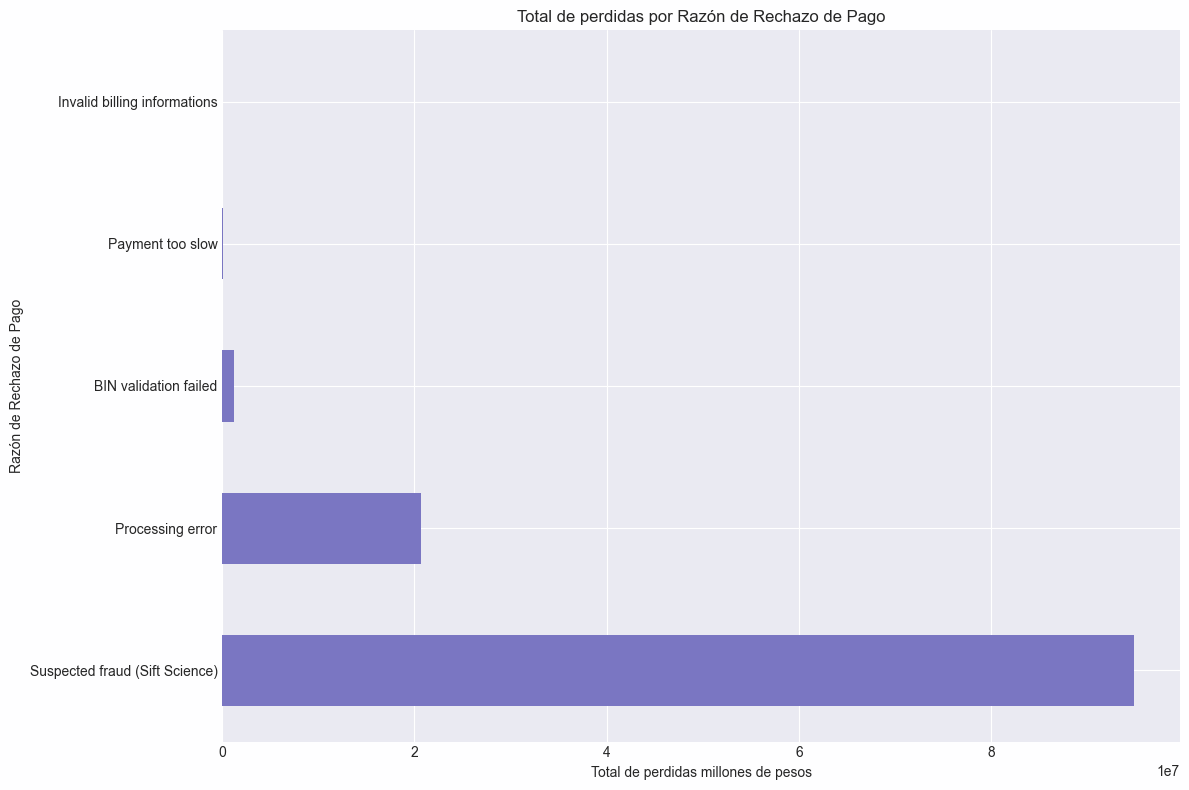

In [ ]:
# grafica de barras horizontales de total_monto_real por razon_rechazo_pago
error_reason_summary.plot(
    kind='barh', 
    y='total_monto_real', 
    figsize=(12, 8), 
    legend=False
)
plt.title('Total de perdidas por Razón de Rechazo de Pago')
plt.xlabel('Total de perdidas millones de pesos')
plt.ylabel('Razón de Rechazo de Pago')
plt.tight_layout()
plt.show()

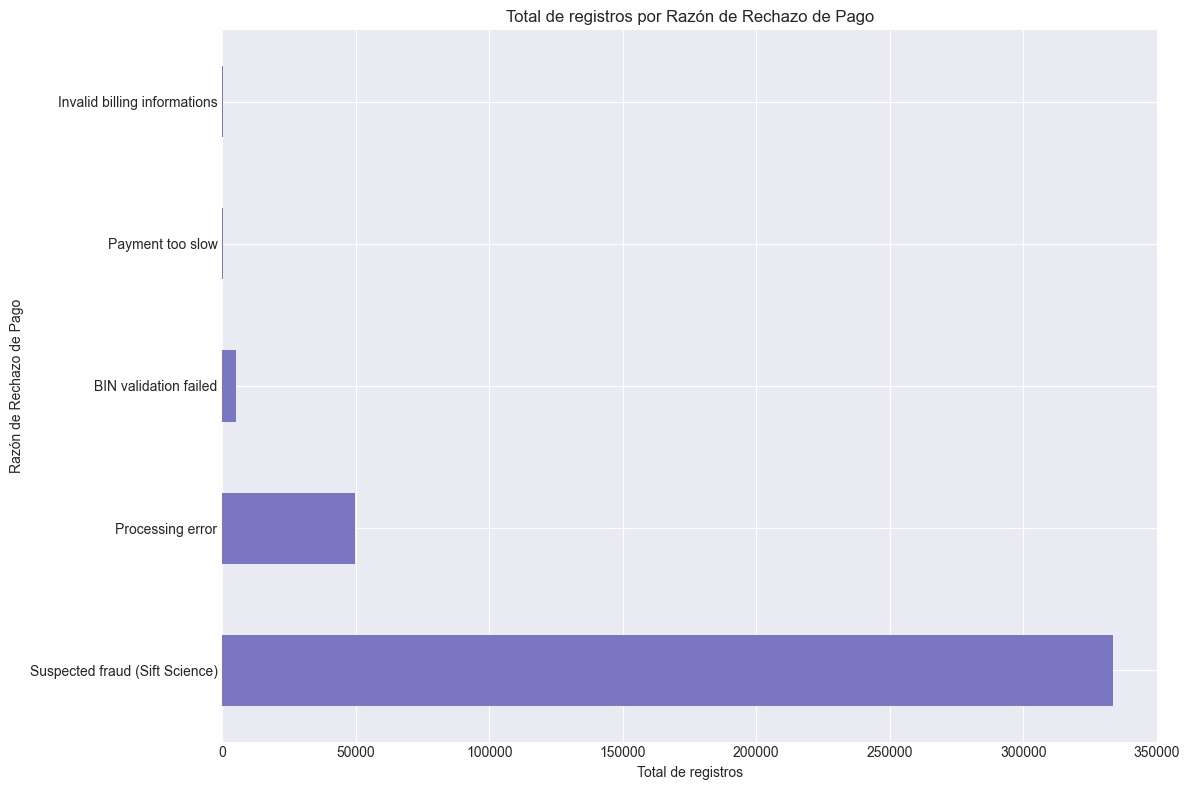

In [ ]:
# grafica de barras horizontales de total_monto_real por razon_rechazo_pago
error_reason_summary.plot(
    kind='barh', 
    y='count', 
    figsize=(12, 8), 
    legend=False
)
plt.title('Total de registros por Razón de Rechazo de Pago')
plt.xlabel('Total de registros')
plt.ylabel('Razón de Rechazo de Pago')
plt.tight_layout()
plt.show()

#### 